## Education Project: Cleaning Data

In this project, my goal is to pull together data on American high school education from multiple sources and clean and combine them in order to answer a few basic questions. In particular, I consider high school data from two large American cities of similar sizes, Milwaukee (population 595,351 by 2017 estimates) and Las Vegas (population 641,676 by 2017 estimates). The metropolitan areas of these two cities are considered by some measures to be the most segregated and least segregated metropolitan areas in the United States ([Brookings, 2018](https://www.brookings.edu/blog/the-avenue/2018/12/17/black-white-segregation-edges-downward-since-2000-census-shows/)) with segregation scores of 79.8 (out of 100) and 39.5, respectively.

I occupy myself primarily with a few fairly simple questions.
1. In comparing these two cities, is there a difference in the types of high schools that students attend? Here I consider the fraction of high school students attending regular public high schools, alternative high schools, charter high schools, private high schools, or some other type of school. (Note that homeschooled students do not appear in this analysis. According to the National Center for Education Statistics, roughly [3.8 percent](https://nces.ed.gov/programs/digest/d17/tables/dt17_206.10.asp) of American high school students are homeschooled.)
2. For these two cities, how does the ethnic make up of the different types of high schools compare with the ethinc make up of each city as a whole? 
3. For these two cities, how does the access of minority students to advanced placement (AP) examinations differ from their access to AP exams nationally?
4. In comparing these two cities, how do they differ with regards to average class size? How do they differ in regards to school financing?

In order to answer these questions, I use data from several different sources.
1. [The Civil Rights Data Collection](https://ocrdata.ed.gov/flex/Reports.aspx?type=school) which provides data on, among other things, school demographics, school finances, high school math and science classes, students with disabilities, etc for publicly funded (i.e. public and charter) schools. From here, I pulled the following data sets for both Milwaukee and Las Vegas:
    - Advanced placement course and test taking
    - Enrollment data
    - School finance data -- state and local funds
    - Teachers and high school counselors
2. The National Center for Education Statistics (NCES) [common core of data](https://nces.ed.gov/ccd/schoolsearch/index.asp)(for publicly funded schools)**YOU NEED A BETTER DESCRIPTION HERE**
3. The National Center for Education Statistics [private school universe survey](https://nces.ed.gov/surveys/pss/privateschoolsearch/index.asp) (for private schools). Note that this is the only real source of data that I have for private schools, which are, generally speaking, not included in the civil rights data collection data.
4. The College Board [AP Data score summary](https://research.collegeboard.org/programs/ap/data) for 2011, 2013, and 2017, broken down by race and test.
5. The United States Census Bureau Fact finder data for city populations by race (2017) for [Las Vegas](https://factfinder.census.gov/bkmk/table/1.0/en/ACS/17_5YR/B03002/1600000US3240000) and [Milwaukee](https://factfinder.census.gov/bkmk/table/1.0/en/ACS/17_5YR/B03002/1600000US5553000)

In [1]:
import pandas as pd
from bs4 import BeautifulSoup 
import urllib.request
from contextlib import closing
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from collections import Counter


# TO DUMP ONCE I'M SURE THAT I'VE TRANSFERRED ALL IMPORTANT INFORMATION

So, to begin with, what do I want to do here? This project is supposed to be primarily a data cleaning project, which means that I want to pull together data from an array of different sources with the idea of creating a single data frame or collection of data frames that allow me to answer questions that I might have.

### Inspiration ###

I was inspired by an Brookings Institute article that I recently read referencing the [degree of segregation](https://www.brookings.edu/blog/the-avenue/2018/12/17/black-white-segregation-edges-downward-since-2000-census-shows/) in the 51 largest metropolitan areas in the United States. Here, Milwaukee was the most segregated with a segregation score of 79.8 while Las Vegas was the least segregated with a segregation score of 39.5. 

### Goal ###

My goal is to explore the educational impact of more and less segregated metropolitan areas on the education of high school students. To wit, I want to compare the high schools in Milwaukee with those in Las Vegas, with the understanding that I'm talking about a quite small sample here. Since this is primarily a data cleaning exercise, I think that shouldn't be a problem.

### Data ###

The data that I'm using comes primarily from three sources:
1. [The Civil Rights Data Collection](https://ocrdata.ed.gov/flex/Reports.aspx?type=school) which provides data on, among other things, school demographics, school finances, high school math and science classes, students with disabilities, etc for publicly funded (i.e. public and charter) schools. From here, I pulled the following data sets for both Milwaukee and Las Vegas:
    - Advanced placement course and test taking
    - High school completers
    - High school math and science
    - Enrollment data
    - Students with disabilities by disability category
    - School finance data -- state and local funds
    - Teachers and high school counselors
2. The National Center for Education Statistics [common core of data](https://nces.ed.gov/ccd/schoolsearch/index.asp)(for publicly funded schools)
3. The National Center for Education Statistics [private school universe survey](https://nces.ed.gov/surveys/pss/privateschoolsearch/index.asp) (for private schools). Note that this is the only real source of data that I have for private schools, which are, generally speaking, not included in the civil rights data collection data.
4. The National Center for Education Statistics [Status and Trends in the Education of Racial and Ethnic Groups](https://nces.ed.gov/programs/digest/d15/tables/dt15_203.50.asp)
5. The National Center for Education Statistics [Public High School Graduation Rates] (https://nces.ed.gov/programs/digest/d17/tables/dt17_219.46.asp)
6. The National Center for Education Statistics [High School Coursetaking](https://nces.ed.gov/programs/coe/indicator_cod.asp)
7. The College Board [AP Data score summary](https://research.collegeboard.org/programs/ap/data) for 2011, 2013, and 2017, broken down by race and test.
8. Information on [dropout](https://nces.ed.gov/pubs2016/2016117rev.pdf) rates and [here](http://www.pewresearch.org/fact-tank/2014/10/02/u-s-high-school-dropout-rate-reaches-record-low-driven-by-improvements-among-hispanics-blacks/)

9. The United States Census Bureau Fact finder data for city populations by race (2017) for [Las Vegas](https://factfinder.census.gov/bkmk/table/1.0/en/ACS/17_5YR/B03002/1600000US3240000) and [Milwaukee](https://factfinder.census.gov/bkmk/table/1.0/en/ACS/17_5YR/B03002/1600000US5553000)

One thing that I want to find, and haven't yet, at least not in easy form, is information about the types of the public/charter schools, in particular, which of them are alternative schools and which are not. This is, in fact, on the private school summary that I have, but it isn't anywhere on the public school data that I have.



### Question 1:  Is there a difference in the types of high schools that students attend in Milwaukee versus the types of high schools that students attend in Las Vegas?

To begin with here, we read in the .csv files containing public and private school enrollment data for both Milwaukee and Las Vegas. 

In [2]:
vegas_public = pd.read_csv('Education_Project/Las_Vegas_public.csv')
vegas_private = vegas_private = pd.read_csv('Education_Project/Las_Vegas_private.csv')

milwaukee_public = pd.read_csv('Education_Project/Milwaukee_public.csv')
milwaukee_private = pd.read_csv('Education_Project/Milwaukee_private.csv')

Now, each of these dataframes has some excess information at the top that needs to be deleted, and the private school dataframes have some missing data. We begin by fixing this.

In [3]:
# Eliminating the excess information at the top of the public school dataframes, renaming the columns,
# and resetting the indices

vegas_public = vegas_public.iloc[5:].rename(columns = vegas_public.iloc[4]).reset_index(drop = True)
milwaukee_public = milwaukee_public.iloc[5:].rename(columns = milwaukee_public.iloc[4]).reset_index(drop = True)

In [4]:
# Eliminating the excess information at the top of the private school dataframes, renaming the columns,
# resetting the indices, and filling any holes in high school enrollment numbers with zeros

vegas_private = vegas_private.iloc[4:].rename(columns = vegas_private.iloc[3])
vegas_private.reset_index(inplace = True, drop = True)

vegas_private['PSS_ENROLL_9'] = vegas_private['PSS_ENROLL_9'].fillna(0)
vegas_private['PSS_ENROLL_10'] = vegas_private['PSS_ENROLL_10'].fillna(0)
vegas_private['PSS_ENROLL_11'] = vegas_private['PSS_ENROLL_11'].fillna(0)
vegas_private['PSS_ENROLL_12'] = vegas_private['PSS_ENROLL_12'].fillna(0)

milwaukee_private = milwaukee_private.iloc[4:].rename(columns = milwaukee_private.iloc[3])
milwaukee_private.reset_index(inplace = True, drop = True)

milwaukee_private['PSS_ENROLL_9'] = milwaukee_private['PSS_ENROLL_9'].fillna(0)
milwaukee_private['PSS_ENROLL_10'] = milwaukee_private['PSS_ENROLL_10'].fillna(0)
milwaukee_private['PSS_ENROLL_11'] = milwaukee_private['PSS_ENROLL_11'].fillna(0)
milwaukee_private['PSS_ENROLL_12'] = milwaukee_private['PSS_ENROLL_12'].fillna(0)

If we look at the data in the private school dataframes, we see that they include information about enrollment by grade as well as information about the type of school. This information is missing from the the public school dataframes, but is important. As a result, it needs to be added to the data that we have by looking at the individual school description pages for the public schools that we have. We use the functions ```school_type``` and ```grade_enrollment``` to add this information to the public school dataframes.

In [5]:
"""
Function: school_type 

Inputs: soup -- The Beautiful Soup output of a html document for a particular school

Returns: a code for the type of school under consideration
"""

def school_type(soup):
    
    possible_school_types = {'Regular':'Regular school', 'Other/a':'Other/alternative school', 
                             'Special':'Special education school', 'Vocatio':'Vocational school'}
    
    index = soup.find('Type:')
    key = soup[index+99:index+106]
    
    return possible_school_types[key]

In [6]:
"""
Function:

Inputs:

Returns:

"""

def grade_enrollment(soup,low_grade, high_grade):

    start_index = soup.find('Enrollment by Grade:')
    end_index = soup.find('Enrollment by Race')
    
    string_to_use = soup[start_index:end_index]
    
    while '<' in string_to_use:
        i = 0
        while string_to_use[i] != '<':
            i = i+1
        
        j = i
        while string_to_use[j] != '>':
            j = j+1
        
        string_to_use = "".join([string_to_use[:i], string_to_use[j+1:]])
        
    strings = string_to_use.split()
    
    # Now, from here, I want to pull out the enrollments for high school...
    
    if low_grade == 'KG':
        low_grade = 0
    elif low_grade == 'PK':
        low_grade = -1
        
    grade_count = {}
    try:
        for i in range(3, strings.index('Students')):
            grade_count[strings[i]] = strings[strings.index('Students')+i-2]
        for key in ['9','10','11','12']:
            if key not in grade_count.keys():
                grade_count[key] = 0
    except: # there is no student data (new school, for example)
        grade_count = {'9':0, '10':0, '11':0,'12':0}
    
    return grade_count

In [7]:
"""
Function:

Inputs:

Returns:
"""

def modify_public(location,code,low_grade, high_grade):
    
    if location == 'vegas':
        link = ('https://nces.ed.gov/ccd/schoolsearch/school_detail.asp?'
        'Search=1&City=las+vegas&State=32&SchoolType=1&SchoolType=2&'
        'SchoolType=3&SchoolType=4&SpecificSchlTypes=all&IncGrade=10&'
        'LoGrade=-1&HiGrade=-1&SchoolPageNum=4&ID=')
    else:
        link = ('https://nces.ed.gov/ccd/schoolsearch/school_detail.asp?'
                'Search=1&City=milwaukee&State=55&SchoolType=1&SchoolType=2&'
                'SchoolType=3&SchoolType=4&SpecificSchlTypes=all&IncGrade=10&'
                'LoGrade=-1&HiGrade=-1&ID=')
    school_link = "".join([link,str(code)])
    
    with closing(urllib.request.urlopen(school_link)) as html_code:
        soup = BeautifulSoup(html_code,'html.parser')
        
    soup = soup.prettify()

    enrollment = grade_enrollment(soup,low_grade, high_grade)
    type_of_school = school_type(soup)
    
    return type_of_school, enrollment

In [8]:
# adding type of school and high school enrollment for the Las Vegas Public Schools

for i in range(len(vegas_public)):
        
    code = vegas_public.loc[i,'NCES School ID']
    low_grade = vegas_public.loc[i,'Low Grade*']
    high_grade = vegas_public.loc[i,'High Grade*']

    type_of_school, grade_data = modify_public('vegas', code, low_grade, high_grade)

    vegas_public.loc[i,'School Type'] = type_of_school
    
    vegas_public.loc[i, 'Grade 9'] = grade_data['9']
    vegas_public.loc[i, 'Grade 10'] = grade_data['10']
    vegas_public.loc[i, 'Grade 11'] = grade_data['11']
    vegas_public.loc[i, 'Grade 12'] = grade_data['12']


In [9]:
# adding type of school and high school enrollment for the Milwaukee Public Schools

for i in range(len(milwaukee_public)):
    
    code = milwaukee_public.loc[i,'NCES School ID']
    low_grade = milwaukee_public.loc[i,'Low Grade*']
    high_grade = milwaukee_public.loc[i,'High Grade*']

    type_of_school, grade_data = modify_public('milwaukee', code, low_grade, high_grade)

    milwaukee_public.loc[i,'School Type'] = type_of_school
    
    milwaukee_public.loc[i, 'Grade 9'] = grade_data['9']
    milwaukee_public.loc[i, 'Grade 10'] = grade_data['10']
    milwaukee_public.loc[i, 'Grade 11'] = grade_data['11']
    milwaukee_public.loc[i, 'Grade 12'] = grade_data['12']



Next, we look at the sort of data available in each of these dataframes. We can do this most easily by looking at the columns. For the public school data we have:
- NCES School ID: The identification number assigned to the school by the NCES. This is consistant across all of our data and can be used to align data from different sources.
- State School ID: The identification number assigned to the state by the NCES. This will not be used here.   
- NCES District ID: The district ID assigned by the NCES. This can be used to filter charter schools sponsered by outside agencies.
- State District ID: The district ID assigned by the state. This will not be used here. 
- Low Grade\*: The lowest grade taught at the school.
- High Grade\*: The highest grade taught at the school.  
- School Name: The name of the school.
- District: The name of the school district responsible for overseeing the school.  
- County Name*: The name of the county in which the school is located. This will not be used here.   
- Street Address: The street address of the school. This will not be used here.    
- City: The city in which the school is located. Since our initial filtering in downloading the data was done by city, this will not be used here.    
- State: The state in which the school is located. This will not be used here.
- ZIP: The zip code of the school. Unused.
- ZIP 4-digit: The zip code extension for the school. Unused.
- Phone: The phone number of the school. Unused.
- Locale Code\*: A two digit code describing the setting of the school (urban, suburban, or rural).
- Locale\*: A description of the setting of the school.
- Charter: Whether or not the school is a charter school.    
- Magnet\*: Whether or not the school is a magnet school.
- Title I School\*: Whether or not the school receives any Title I funding. Unused.  
- Title 1 School Wide\*: Whether or not the school receives schoolwide Title I funding. Unused.
- Students\*: The number of students enrolled in the school.
- Teachers\*: The number of teachers employed by the school.
- Student Teacher Ratio\*: The ratio of students to teachers. Note that this is not the same as class size.
- Free Lunch\*: The number of students eligible for free lunch.
- Reduced Lunch\*: The number of students eligible for reduced price lunch. Together with the data on free lunches, this is a good measure of the level of poverty in the student body.  
- School Type: The type of school. Possibilities are regular school, other or alternative school, special education school, or vocational school
- Grade 9: The number of students enrolled in 9th grade.
- Grade 10: The number of students enrolled in 10th grade.
- Grade 11: The number of students enrolled in 11th grade.
- Grade 12: The number of students enrolled in 12th grade.

For the private school dataframes, the information that we have available is as follows:
- PSS_SCHOOL_ID: The identification number assigned to the private school by the NCES
- PSS_INST: The name of the school.
- LoGrade: The lowest grade taught at the school. Codes are as follows:
    ⁃	1 == all ungraded
	⁃	2 == pk
	⁃	3 == k
	⁃	4 == transitional k
	⁃	5 == transitional 1st
	⁃	6 == first grade
	⁃	7 == second grade
	⁃	8 == third grade
	⁃	9 == fourth grade
	⁃	10 == fifth grade
	⁃	11 == sixth grade
	⁃	12 == seventh grade
	⁃	13 == eighth grade
	⁃	14 == ninth grade
	⁃	15 == tenth grade
	⁃	16 == eleventh grade
	⁃	17 == twelfth grade
- HiGrade: The highest grade taught at the school. Codes are the same as for LoGrade.
- PSS_ADDRESS: The street address of the school. This will not be used here.
- PSS_CITY: The city in which the school is located. This will not be used here.
- PSS_COUNTY_NO: A numerical code assigned to the county in which the school is located. This will not be used here.
- PSS_COUNTY_FIPS: The code assigned to the county by the Federal Information Processing Standard (FIPS). This will not be used here.
- PSS_STABB: The USPS state abbreviation. This will not be used here.
- PSS_FIPS: The code assinged to the state by FIPS. This will not be used here.
- PSS_ZIP5: The zip code of the school address. This will not be used here.
- PSS_PHONE: The school phone number. This will not be used here.
- PSS_SCH_DAYS: The number of instructional days that the school is in session.
- PSS_STU_DAY_HRS: The number of instructional hours in the day.
- PSS_LIBRARY: A code indicating whether or not the school has a library on site. This will not be used here.
- PSS_ENROLL_UG: The number of ungraded students enrolled in the school. This will not be used here.
- PSS_ENROLL_PK: The number of students enrolled in preschool/pre-kindergarten. This will not be used here.
- PSS_ENROLL_K: The number of students enrolled in kindergarten. This will not be used here.
- PSS_ENROLL_1: The number of students enrolled in first grade. This will not be used here.
- PSS_ENROLL_2: The number of students enrolled in second grade. This will not be used here.
- PSS_ENROLL_3: The number of students enrolled in third grade. This will not be used here.
- PSS_ENROLL_4: The number of students enrolled in fourth grade. This will not be used here.
- PSS_ENROLL_5: The number of students enrolled in fifth grade. This will not be used here.
- PSS_ENROLL_6: The number of students enrolled in sixth grade. This will not be used here.
- PSS_ENROLL_7: The number of students enrolled in seventh grade. This will not be used here.
- PSS_ENROLL_8: The number of students enrolled in eighth grade.
- PSS_ENROLL_9: The number of students enrolled in ninth grade.
- PSS_ENROLL_10: The number of students enrolled in tenth grade.
- PSS_ENROLL_11: The number of students enrolled in eleventh grade.
- PSS_ENROLL_12: The number of students enrolled in twelth grade.
- PSS_ENROLL_T: The total number of enrolled students.
- PSS_ENROLL_TK12: The total number of enrolled students in kindergarten through twelth grade.
- PSS_RACE_AI: The number of enrolled Native American and Alaskan Native students.
- PSS_RACE_AS: The number of enrolled Asian students.
- PSS_RACE_H: The number of enrolled Hispanic students.
- PSS_RACE_B: The number of enrolled Black students.
- PSS_RACE_W: The number of enrolled White students.
- PSS_RACE_P: The number of enrolled Hawaiian and Pacific Islander students.
- PSS_RACE_2: The number of multiracial students enrolled.
- PSS_FTE_TEACH: The number of teachers (full time equivalent) employeed by the school.
- PSS_LOCALE: The type of community in which the school is located.
- PSS_COED: Whether the school is coeducational, all male, or all female. This will not be used here.
- PSS_TYPE: The school program type or emphasis. This will not be used here.
- PSS_LEVEL: Whether the school is an elementary school, a secondary school, or both. This will not be used here.
- PSS_RELIG: The school's religious affiliation or orientation (or lack thereof). This will not be used here.
- PSS_COMM_TYPE: A numerical version of the locale.
- PSS_INDIAN_PCT: The percentage of enrolled students who are Native American or Alaska Native. This will not be used here.
- PSS_ASIAN_PCT: The percentage of enrolled students who are Asian. This will not be used here.
- PSS_HISP_PCT: The percentage of enrolled students who are Hispanic. This will not be used here.
- PSS_BLACK_PCT: The percentage of enrolled students who are Black. This will not be used here.
- PSS_WHITE_PCT: The percentage of enrolled students who are White. This will not be used here.
- P_PACISL_PCT: The percentage of enrolled students who are Hawaiian or Pacific Islander. This will not be used here.
- P_TWOMORE_PCT: The percentage of enrolled students who are multiracial. This will not be used here.
- PSS_STDTCH_RT: The student teacher ratio. This will not be used here.
- PSS_ORIENT: A numerical code indictating the religious orientation of the school. This will not be used here.
- PSS_COUNTY_NAME: The name of the county in which the school is located. This will not be used here.
- PSS_ASSOC_1: The first association with which the school has an affiliation. This will not be used here.
- PSS_ASSOC_2: The second association with which the school has an affiliation. This will not be used here.
- PSS_ASSOC_3: The third association with which the school has an affiliation. This will not be used here.
- PSS_ASSOC_4: The fourth association with which the school has an affiliation. This will not be used here.
- PSS_ASSOC_5: The fifth association with which the school has an affiliation. This will not be used here.
- PSS_ASSOC_6: The sixth association with which the school has an affiliation. This will not be used here.
- PSS_ASSOC_7: The seventh association with which the school has an affiliation. This will not be used here.
- PSS_ASSOC_8: The eighth association with which the school has an affiliation. This will not be used here.

### Question 1 restated: 
In comparing these two cities, is there a difference in the types of high schools that students attend? Here I consider the fraction of high school students attending regular public high schools, alternative high schools, charter high schools, private high schools, or some other type of school.

Here, we begin by removing unnecessary data from our four dataframes.

In [10]:
milwaukee_public = milwaukee_public[[u'NCES School ID', u'NCES District ID', u'Low Grade*', u'High Grade*',
                                     u'School Name', u'District', u'Locale Code*', u'Locale*', u'Charter',
                                     u'Magnet*', u'Students*', u'Teachers*', u'Student Teacher Ratio*', 
                                     u'Free Lunch*', u'Reduced Lunch*', u'School Type', u'Grade 9', u'Grade 10',
                                     u'Grade 11', u'Grade 12']].copy()

vegas_public = vegas_public[[u'NCES School ID', u'NCES District ID', u'Low Grade*', u'High Grade*',
                             u'School Name', u'District', u'Locale Code*', u'Locale*', u'Charter',
                             u'Magnet*', u'Students*', u'Teachers*', u'Student Teacher Ratio*', 
                             u'Free Lunch*', u'Reduced Lunch*', u'School Type', u'Grade 9', u'Grade 10',
                             u'Grade 11', u'Grade 12']].copy()

milwaukee_private = milwaukee_private[[u'PSS_SCHOOL_ID', u'PSS_INST', u'LoGrade', u'HiGrade', u'PSS_SCH_DAYS', 
                                       u'PSS_STU_DAY_HRS', u'PSS_ENROLL_9', u'PSS_ENROLL_10', 
                                       u'PSS_ENROLL_11', u'PSS_ENROLL_12', u'PSS_ENROLL_T', u'PSS_ENROLL_TK12', 
                                       u'PSS_RACE_AI', u'PSS_RACE_AS', u'PSS_RACE_H', u'PSS_RACE_B', u'PSS_RACE_W',
                                       u'PSS_RACE_P', u'PSS_RACE_2', u'PSS_FTE_TEACH', u'PSS_LOCALE',
                                       u'PSS_COMM_TYPE']].copy()

vegas_private = vegas_private[[u'PSS_SCHOOL_ID', u'PSS_INST', u'LoGrade', u'HiGrade', u'PSS_SCH_DAYS', 
                                       u'PSS_STU_DAY_HRS', u'PSS_ENROLL_9', u'PSS_ENROLL_10', 
                                       u'PSS_ENROLL_11', u'PSS_ENROLL_12', u'PSS_ENROLL_T', u'PSS_ENROLL_TK12', 
                                       u'PSS_RACE_AI', u'PSS_RACE_AS', u'PSS_RACE_H', u'PSS_RACE_B', u'PSS_RACE_W',
                                       u'PSS_RACE_P', u'PSS_RACE_2', u'PSS_FTE_TEACH', u'PSS_LOCALE',
                                       u'PSS_COMM_TYPE']].copy()

Now that I have the data that I want, including high school enrollment data and school types for the publicly funded schools, I want to produce a dataframe for each city that summarizes this data. 

I'm envisioning a table like the following for each of the two cities:

|School|Charter|Alternative|Private|Regular Public|Other|Enrollment (grades 9-12)|
|-----|---|----|----|----|----|---|
|school ID| y/n |y/n|y/n|y/n|y/n|count|
|.|.|.|.|.|.|.|.|
|.|.|.|.|.|.|.|.|
|.|.|.|.|.|.|.|.|
|Totals|# charters|||||Enrolled charter|
|Totals||# altern||||Enrolled altern|
|Totals|||#private|||Enrolled private|
|Totals||||# public||Enrolled public|
|Totals|||||# other|Enrolled other|

From here, calculating percentages is a triviality. 

In [11]:
"""
Function:

Inputs:

Returns:
"""


def schools_by_type(city):
    
    school_enrollments = pd.DataFrame(columns = ['School', 'Charter', 'Alternative','Private', 'Public',
                                                 'Other', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12',
                                                 'Total Enrollment'])
    
    if city == 'Milwaukee':
        public = milwaukee_public
        private = milwaukee_private
    else:
        public = vegas_public
        private = vegas_private
        
    for i in range(len(public)):
        school_enrollments.loc[i, 'School'] = public.loc[i,'NCES School ID']
        school_enrollments.loc[i,'Charter'] = public.loc[i, 'Charter']
        school_enrollments.loc[i,'Private'] = 'N'
        if public.loc[i,'Charter'] in ['N','No','NO']:
            if public.loc[i,'School Type'] == 'Regular school':
                school_enrollments.loc[i,'Alternative'] = 'N'
                school_enrollments.loc[i, 'Public'] = 'Y'
                school_enrollments.loc[i, 'Other'] = 'N'
            elif public.loc[i,'School Type'] == 'Other/alternative school':
                school_enrollments.loc[i,'Alternative'] = 'Y'
                school_enrollments.loc[i, 'Public'] = 'N'
                school_enrollments.loc[i, 'Other'] = 'N'
            else:
                school_enrollments.loc[i,'Alternative'] = 'N'
                school_enrollments.loc[i, 'Public'] = 'N'
                school_enrollments.loc[i, 'Other'] = 'Y'
        else:
            school_enrollments.loc[i,'Alternative'] = 'N'
            school_enrollments.loc[i, 'Public'] = 'N'
            school_enrollments.loc[i, 'Other'] = 'N'

        try:
            school_enrollments.loc[i, 'Grade 9'] = int(public.loc[i,'Grade 9'])
        except: # There is no enrollment figure given
            school_enrollments.loc[i,'Grade 9'] = 0

        try:
            school_enrollments.loc[i, 'Grade 10'] = int(public.loc[i,'Grade 10'])
        except: # There is no enrollment figure given
            school_enrollments.loc[i,'Grade 10'] = 0

        try:
            school_enrollments.loc[i, 'Grade 11'] = int(public.loc[i,'Grade 11'])
        except: # There is no enrollment figure given
            school_enrollments.loc[i,'Grade 11'] = 0

        try:
            school_enrollments.loc[i, 'Grade 12'] = int(public.loc[i,'Grade 12'])
        except: # There is no enrollment figure given
            school_enrollments.loc[i,'Grade 12'] = 0

        school_enrollments.loc[i,'Total Enrollment'] = (school_enrollments.loc[i,'Grade 9'] + 
                                                        school_enrollments.loc[i,'Grade 10'] +
                                                        school_enrollments.loc[i,'Grade 11'] +
                                                        school_enrollments.loc[i,'Grade 12'])

    
    pub = len(public)

    for k in range(len(private)):
        school_enrollments.loc[k+pub, 'School'] = private.loc[k,'PSS_SCHOOL_ID']
        school_enrollments.loc[k+pub, 'Charter'] = 'N'
        school_enrollments.loc[k+pub, 'Alternative'] = 'N'
        school_enrollments.loc[k+pub,'Private'] = 'Y'
        school_enrollments.loc[k+pub,'Public'] = 'N'
        school_enrollments.loc[k+pub,'Other'] = 'N'
        school_enrollments.loc[k+pub,'Grade 9'] = int(private.loc[k,'PSS_ENROLL_9'])
        school_enrollments.loc[k+pub,'Grade 10'] = int(private.loc[k,'PSS_ENROLL_10'])
        school_enrollments.loc[k+pub,'Grade 11'] = int(private.loc[k,'PSS_ENROLL_11'])
        school_enrollments.loc[k+pub,'Grade 12'] = int(private.loc[k,'PSS_ENROLL_12'])
        school_enrollments.loc[k+pub,'Total Enrollment'] = (int(private.loc[k,'PSS_ENROLL_9']) + 
                                                        int(private.loc[k,'PSS_ENROLL_10']) + 
                                                        int(private.loc[k,'PSS_ENROLL_11']) + 
                                                        int(private.loc[k,'PSS_ENROLL_12']))    
    
    
    return school_enrollments

In [12]:
milwaukee_school_enrollments = schools_by_type("Milwaukee")
vegas_school_enrollments = schools_by_type("Vegas")

In [13]:
milwaukee_school_enrollments.head()

,School,Charter,Alternative,Private,Public,Other,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment
0,550960002603,Yes,N,N,N,N,65,52,49,34,200
1,550960000792,No,Y,N,N,N,30,21,38,19,108
2,550960002782,No,N,N,Y,N,100,84,96,91,371
3,550960002707,No,Y,N,N,N,17,19,11,4,51
4,550960001127,No,N,N,Y,N,309,204,174,133,820


In [14]:
"""
Function:

Inputs:

Returns:
"""


def enrollments_by_type(city):
    
    type_enrollments = pd.DataFrame(0,columns = ['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', 'Total Enrollment'],
                     index = ['Charter', 'Alternative', 'Regular Public', 'Total Public', 'Private', 'Total All Types'])
    
    if city == 'Milwaukee':
        school_enrollments = milwaukee_school_enrollments
    else:
        school_enrollments = vegas_school_enrollments
        
    for i in range(len(school_enrollments)):
        if school_enrollments.loc[i,'Charter'] in ['Yes', 'yes', 'Y']:
            type_enrollments.loc['Charter', 'Grade 9'] += school_enrollments.loc[i,'Grade 9']
            type_enrollments.loc['Charter', 'Grade 10'] += school_enrollments.loc[i,'Grade 10']
            type_enrollments.loc['Charter', 'Grade 11'] += school_enrollments.loc[i,'Grade 11']
            type_enrollments.loc['Charter', 'Grade 12'] += school_enrollments.loc[i,'Grade 12']
            type_enrollments.loc['Charter', 'Total Enrollment'] += school_enrollments.loc[i,'Total Enrollment']
        elif school_enrollments.loc[i,'Alternative'] == 'Y':
            type_enrollments.loc['Alternative', 'Grade 9'] += school_enrollments.loc[i,'Grade 9']
            type_enrollments.loc['Alternative', 'Grade 10'] += school_enrollments.loc[i,'Grade 10']
            type_enrollments.loc['Alternative', 'Grade 11'] += school_enrollments.loc[i,'Grade 11']
            type_enrollments.loc['Alternative', 'Grade 12'] += school_enrollments.loc[i,'Grade 12']
            type_enrollments.loc['Alternative', 'Total Enrollment'] += school_enrollments.loc[i,'Total Enrollment']
        elif school_enrollments.loc[i,'Public'] == 'Y':
            type_enrollments.loc['Regular Public', 'Grade 9'] += school_enrollments.loc[i,'Grade 9']
            type_enrollments.loc['Regular Public', 'Grade 10'] += school_enrollments.loc[i,'Grade 10']
            type_enrollments.loc['Regular Public', 'Grade 11'] += school_enrollments.loc[i,'Grade 11']
            type_enrollments.loc['Regular Public', 'Grade 12'] += school_enrollments.loc[i,'Grade 12']
            type_enrollments.loc['Regular Public', 'Total Enrollment'] += school_enrollments.loc[i,'Total Enrollment']
        else:
            type_enrollments.loc['Private', 'Grade 9'] += school_enrollments.loc[i,'Grade 9']
            type_enrollments.loc['Private', 'Grade 10'] += school_enrollments.loc[i,'Grade 10']
            type_enrollments.loc['Private', 'Grade 11'] += school_enrollments.loc[i,'Grade 11']
            type_enrollments.loc['Private', 'Grade 12'] += school_enrollments.loc[i,'Grade 12']
            type_enrollments.loc['Private', 'Total Enrollment'] += school_enrollments.loc[i,'Total Enrollment']

    type_enrollments.loc['Total Public', 'Grade 9'] = (type_enrollments.loc['Charter', 'Grade 9'] + 
                                                       type_enrollments.loc['Alternative', 'Grade 9'] +
                                                       type_enrollments.loc['Regular Public', 'Grade 9'])
    type_enrollments.loc['Total Public', 'Grade 10'] = (type_enrollments.loc['Charter', 'Grade 10'] + 
                                                       type_enrollments.loc['Alternative', 'Grade 10'] +
                                                       type_enrollments.loc['Regular Public', 'Grade 10'])
    type_enrollments.loc['Total Public', 'Grade 11'] = (type_enrollments.loc['Charter', 'Grade 11'] + 
                                                       type_enrollments.loc['Alternative', 'Grade 11'] +
                                                       type_enrollments.loc['Regular Public', 'Grade 11'])
    type_enrollments.loc['Total Public', 'Grade 12'] = (type_enrollments.loc['Charter', 'Grade 12'] + 
                                                       type_enrollments.loc['Alternative', 'Grade 12'] +
                                                       type_enrollments.loc['Regular Public', 'Grade 12'])
    type_enrollments.loc['Total Public', 'Total Enrollment'] = (type_enrollments.loc['Charter', 'Total Enrollment'] + 
                                                       type_enrollments.loc['Alternative', 'Total Enrollment'] +
                                                       type_enrollments.loc['Regular Public', 'Total Enrollment'])
    
    type_enrollments.loc['Total All Types', 'Grade 9'] = (type_enrollments.loc['Total Public', 'Grade 9'] +
                                                          type_enrollments.loc['Private','Grade 9'])
    type_enrollments.loc['Total All Types', 'Grade 10'] = (type_enrollments.loc['Total Public', 'Grade 10'] +
                                                          type_enrollments.loc['Private','Grade 10'])
    type_enrollments.loc['Total All Types', 'Grade 11'] = (type_enrollments.loc['Total Public', 'Grade 11'] +
                                                          type_enrollments.loc['Private','Grade 11'])
    type_enrollments.loc['Total All Types', 'Grade 12'] = (type_enrollments.loc['Total Public', 'Grade 12'] +
                                                          type_enrollments.loc['Private','Grade 12'])
    type_enrollments.loc['Total All Types', 'Total Enrollment'] = (
                                                          type_enrollments.loc['Total Public', 'Total Enrollment'] +
                                                          type_enrollments.loc['Private','Total Enrollment'])

            
    return type_enrollments

In [15]:
milwaukee_enrollments_by_type = enrollments_by_type('Milwaukee')
vegas_enrollments_by_type = enrollments_by_type('Vegas')

Our enrollment dataframes appear below. While they are difficult to compare directly, there appears to be something very strange going on. To be more precise, while the sizes of the populations of Milwaukee and Las Vegas are very similar (595 351 vs 648 224 based on 2017 estimates), the sizes of the high school populations given here are rather different. Based on the data shown here, roughly 5% of the Milwaukee population is enrolled in high school (which seems reasonable assuming a life expectancy of around 80 years). On the other hand, according to this data, nearly 14% of the Las Vegas population is enrolled in high school, which would be rather striking if it were true.



In [16]:
milwaukee_enrollments_by_type

,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment
Charter,1006,662,619,481,2768
Alternative,256,290,447,264,1257
Regular Public,5675,4215,4158,3641,17689
Total Public,6937,5167,5224,4386,21714
Private,2310,2069,1873,1678,7930
Total All Types,9247,7236,7097,6064,29644


In [17]:
vegas_enrollments_by_type

,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment
Charter,1139,1133,1167,986,4425
Alternative,113,142,297,851,1403
Regular Public,20650,20645,19528,18000,78823
Total Public,21902,21920,20992,19837,84651
Private,815,824,751,701,3091
Total All Types,22717,22744,21743,20538,87742


One possible explanation here is that the Las Vegas data includes high schools that are not actually located in the city of Las Vegas, perhaps due to vagaries of postal codes, or the way that the school district is set up. Looking at the ```Locale\*``` column in ```vegas_public``` (below), we see that, while Las Vegas itself meets the critera to be considered a large city (specifically, that its population is greater than 500,000 people), a significant fraction of the listed schools have ```Locale\*``` values of either ```Suburb: Large``` or ```City: Midsize```. For this reason, our next step is to filter out any school whose ```Locale Code\*``` value is not equal to 11 (corresponding to a large city).

Note: Although this seems to be less of an issue for our Milwaukee school data, for consistancy we will apply the same filtering to ```milwaukee_public``` and ```milwaukee_private``` as we do to ```vegas_public``` and ```vegas_private```.

In [18]:
vegas_public.head(8)

,NCES School ID,NCES District ID,Low Grade*,High Grade*,School Name,District,Locale Code*,Locale*,Charter,Magnet*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*,School Type,Grade 9,Grade 10,Grade 11,Grade 12
0,320006000419,3200060,9,12,Advanced Technologies Academy,CLARK COUNTY SCHOOL DISTRICT,11,City: Large,No,Yes,1086,55,19.7,378,147,Regular school,294,299,244,249
1,320000100848,3200001,KG,12,American Preparatory Academy LV,STATE-SPONSORED CHARTER SCHOOLS,21,Suburb: Large,Yes,No,1434,19.5,73.5,24,15,Regular school,58,55,28,0
2,320006000661,3200060,9,12,Arbor View High School,CLARK COUNTY SCHOOL DISTRICT,11,City: Large,No,No,3091,121,25.5,808,207,Regular school,764,823,781,710
3,320000100751,3200001,9,12,Beacon Academy of Nevada,STATE-SPONSORED CHARTER SCHOOLS,21,Suburb: Large,Yes,No,402,11.92,33.7,176,27,Regular school,23,73,123,183
4,320006000011,3200060,9,12,Bonanza High School,CLARK COUNTY SCHOOL DISTRICT,11,City: Large,No,No,2072,83,25,1222,236,Regular school,488,595,517,452
5,320006000313,3200060,9,12,Burk Horizon Southwest Sunset HS,CLARK COUNTY SCHOOL DISTRICT,12,City: Midsize,No,No,118,14,8.4,109,9,Other/alternative school,0,3,23,92
6,320006000567,3200060,9,12,Canyon Springs High School and the Leadership ...,CLARK COUNTY SCHOOL DISTRICT,21,Suburb: Large,No,Yes,2923,116,25.2,2237,231,Regular school,780,801,723,609
7,320006000493,3200060,9,12,Centennial High School,CLARK COUNTY SCHOOL DISTRICT,11,City: Large,No,No,3257,120,27.1,3011,246,Regular school,835,778,849,776


In [19]:
vegas_public = vegas_public.loc[vegas_public['Locale*'] == 'City: Large'].copy()
vegas_public.reset_index(inplace = True, drop = True)

vegas_private = vegas_private.loc[vegas_private['PSS_LOCALE'] == '11'].copy()
vegas_private.reset_index(inplace = True, drop = True)

In [20]:
milwaukee_public = milwaukee_public.loc[milwaukee_public['Locale*'] == 'City: Large'].copy()
milwaukee_public.reset_index(inplace = True, drop = True)

milwaukee_private = milwaukee_private.loc[milwaukee_private['PSS_LOCALE'] == '11'].copy()
milwaukee_private.reset_index(inplace = True, drop = True)

Having reduced the sizes of our school dataframes by eliminating any schools located in the suburbs, we rerun ```schools_by_type``` and ```enrollments_by_type``` to produce summaries of our newly restricted data.

In [21]:
milwaukee_school_enrollments = schools_by_type("Milwaukee")
vegas_school_enrollments = schools_by_type("Vegas")

milwaukee_enrollments_by_type = enrollments_by_type('Milwaukee')
vegas_enrollments_by_type = enrollments_by_type('Vegas')

In [22]:
milwaukee_enrollments_by_type

,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment
Charter,1006,662,619,481,2768
Alternative,256,290,447,264,1257
Regular Public,5385,3951,3835,3358,16529
Total Public,6647,4903,4901,4103,20554
Private,2100,1886,1696,1521,7203
Total All Types,8747,6789,6597,5624,27757


In [23]:
vegas_enrollments_by_type

,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment
Charter,480,451,485,414,1830
Alternative,88,95,139,184,506
Regular Public,8231,8314,7714,7102,31361
Total Public,8799,8860,8338,7700,33697
Private,83,105,96,98,382
Total All Types,8882,8965,8434,7798,34079


Our new data summaries suggest that Las Vegas has a slighly higher percentage of students in high school than does Milwaukee, but not enough higher to be shocking. At this point, it makes sense to compute percentages for each of these dataframes in order to facilitate comparing the data. 

In [24]:
"""
Function:

Inputs:

Returns:
"""


def percent_enrollment(df):
    
    enrollments = df.copy()
    for i in range(len(enrollments)):
        for j in range(enrollments.shape[1]):
            enrollments.iloc[i,j] = round(enrollments.iloc[i,j]*100.0/enrollments.iloc[-1,j],1)
            
    return enrollments

In [25]:
vegas_percents = percent_enrollment(vegas_enrollments_by_type)
milwaukee_percents = percent_enrollment(milwaukee_enrollments_by_type)

Looking once again at the data we have:

In [26]:
milwaukee_percents

,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment
Charter,11.5,9.8,9.4,8.6,10.0
Alternative,2.9,4.3,6.8,4.7,4.5
Regular Public,61.6,58.2,58.1,59.7,59.5
Total Public,76.0,72.2,74.3,73.0,74.0
Private,24.0,27.8,25.7,27.0,26.0
Total All Types,100.0,100.0,100.0,100.0,100.0


In [27]:
vegas_percents

,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment
Charter,5.4,5.0,5.8,5.3,5.4
Alternative,1.0,1.1,1.6,2.4,1.5
Regular Public,92.7,92.7,91.5,91.1,92.0
Total Public,99.1,98.8,98.9,98.7,98.9
Private,0.9,1.2,1.1,1.3,1.1
Total All Types,100.0,100.0,100.0,100.0,100.0


A quick glance at these data tables makes it clear that a far higher percentage of students in Las Vegas attend regular public schools than do students in Milwaukee. In order to have a clearer picture of what is going on, we can look at some visualizations of our data. The most straightforward choice here is a side-by-side bar chart.

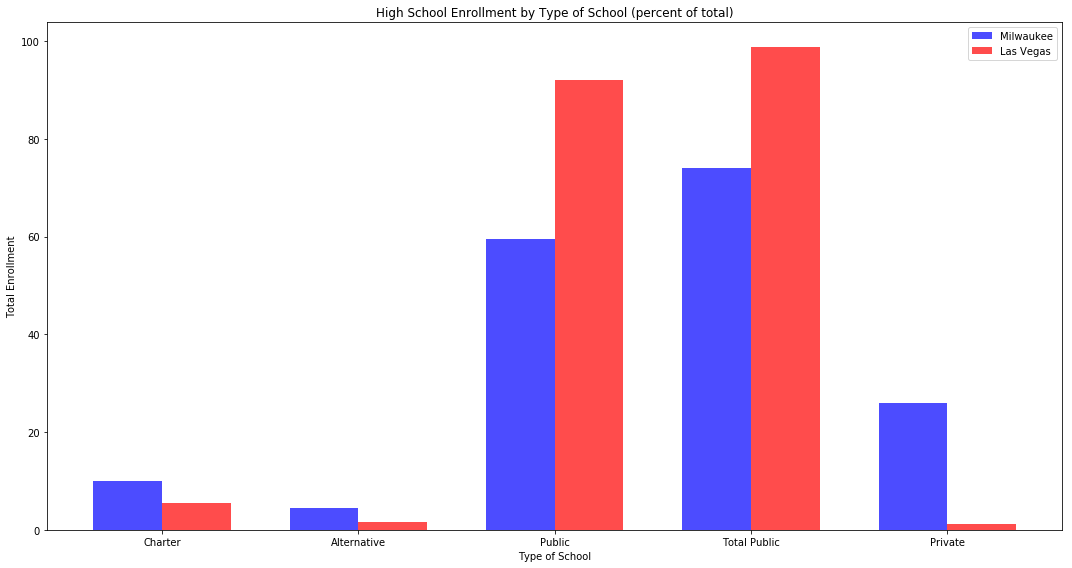

In [28]:
n_groups = 5

fig, ax = plt.subplots(figsize = (15,8))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, milwaukee_percents['Total Enrollment'].tolist()[:5], bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = ax.bar(index + bar_width, vegas_percents['Total Enrollment'].tolist()[:5], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Las Vegas')

ax.set_xlabel('Type of School')
ax.set_ylabel('Total Enrollment')
ax.set_title('High School Enrollment by Type of School (percent of total)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Charter', 'Alternative', 'Public', 'Total Public', 'Private'))
ax.legend()

fig.tight_layout()
plt.show()
plt.close()

From our graph, it is clear that the percentage of students in regular public high schools in Las Vegas far exceeds the percentage of students in regular public high schools in Milwaukee. While some of this difference is driven by the increased enrollment in charter schools and alternative schools in Milwaukee, the bulk of it is driven by enrollment in private schools. This accounts for nearly 26% of Milwaukee high school enrollment, but only around 1% of Las Vegas high school enrollment. 

Next, let's look at how these distributions change from class year to class year.

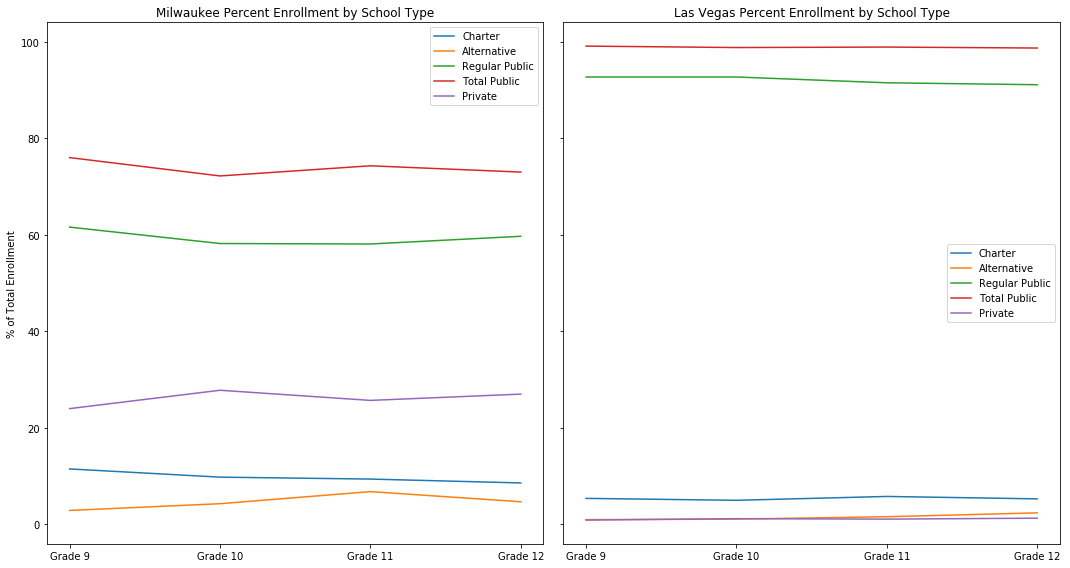

In [29]:
fig, axs = plt.subplots(1, 2, figsize = (15,8), sharey = True)

# First subplot

grades = ['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

Charter = milwaukee_percents.loc['Charter'].tolist()[:4]
Alternative = milwaukee_percents.loc['Alternative'].tolist()[:4]
Public = milwaukee_percents.loc['Regular Public'].tolist()[:4]
Total_Public = milwaukee_percents.loc['Total Public'].tolist()[:4]
Private = milwaukee_percents.loc['Private'].tolist()[:4]

axs[0].plot(grades, Charter, label="Charter")
axs[0].plot(grades, Alternative, label="Alternative")
axs[0].plot(grades, Public, label="Regular Public")
axs[0].plot(grades, Total_Public, label="Total Public")
axs[0].plot(grades, Private, label="Private")
axs[0].set_title('Milwaukee Percent Enrollment by School Type')
axs[0].set_ylabel('% of Total Enrollment')
axs[0].legend()

# Second subplot

grades = ['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

Charter = vegas_percents.loc['Charter'].tolist()[:4]
Alternative = vegas_percents.loc['Alternative'].tolist()[:4]
Public = vegas_percents.loc['Regular Public'].tolist()[:4]
Total_Public = vegas_percents.loc['Total Public'].tolist()[:4]
Private = vegas_percents.loc['Private'].tolist()[:4]

axs[1].plot(grades, Charter, label="Charter")
axs[1].plot(grades, Alternative, label="Alternative")
axs[1].plot(grades, Public, label="Regular Public")
axs[1].plot(grades, Total_Public, label="Total Public")
axs[1].plot(grades, Private, label="Private")
axs[1].set_title('Las Vegas Percent Enrollment by School Type')
axs[1].legend()

# Show the plots

fig.tight_layout()
plt.show()

plt.close()

While these plots are somewhat informative, (we see for instance that the division of enrollments is more stable for Las Vegas than for Milwaukee), it might be even more interesting to look at the raw numbers of enrollments in each grade and for each type and to see how those change through the high school grades.

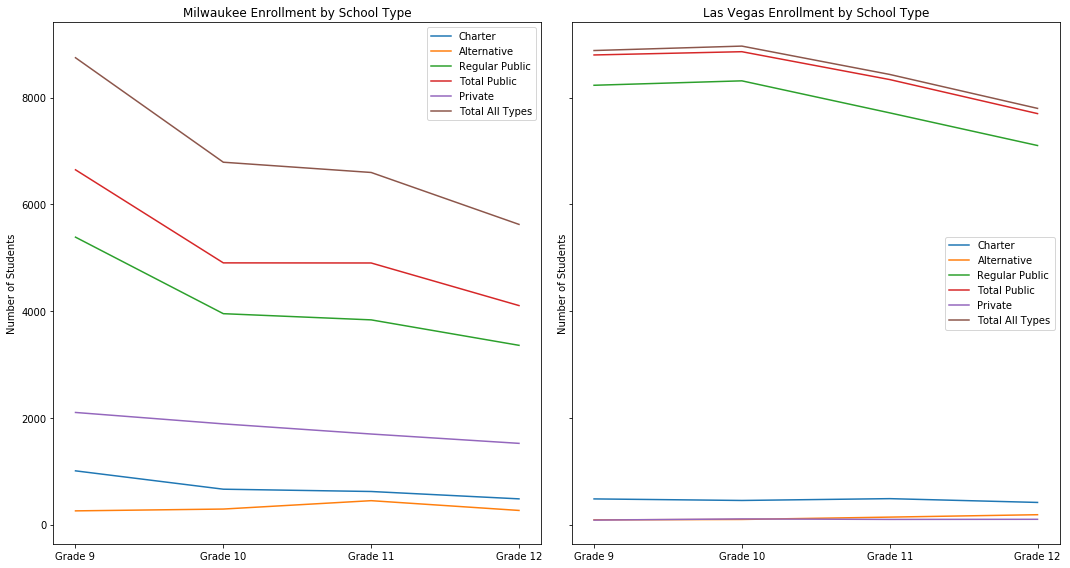

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (15,8), sharey = True)

# First subplot

grades = ['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

Charter = milwaukee_enrollments_by_type.loc['Charter'].tolist()[:4]
Alternative = milwaukee_enrollments_by_type.loc['Alternative'].tolist()[:4]
Public = milwaukee_enrollments_by_type.loc['Regular Public'].tolist()[:4]
Total_Public = milwaukee_enrollments_by_type.loc['Total Public'].tolist()[:4]
Private = milwaukee_enrollments_by_type.loc['Private'].tolist()[:4]
Total = milwaukee_enrollments_by_type.loc['Total All Types'].tolist()[:4]

axs[0].plot(grades, Charter, label="Charter")
axs[0].plot(grades, Alternative, label="Alternative")
axs[0].plot(grades, Public, label="Regular Public")
axs[0].plot(grades, Total_Public, label="Total Public")
axs[0].plot(grades, Private, label="Private")
axs[0].plot(grades, Total, label = "Total All Types")

axs[0].set_title('Milwaukee Enrollment by School Type')
axs[0].set_ylabel('Number of Students')
axs[0].legend()

# Second subplot

grades = ['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

Charter = vegas_enrollments_by_type.loc['Charter'].tolist()[:4]
Alternative = vegas_enrollments_by_type.loc['Alternative'].tolist()[:4]
Public = vegas_enrollments_by_type.loc['Regular Public'].tolist()[:4]
Total_Public = vegas_enrollments_by_type.loc['Total Public'].tolist()[:4]
Private = vegas_enrollments_by_type.loc['Private'].tolist()[:4]
Total = vegas_enrollments_by_type.loc['Total All Types'].tolist()[:4]

axs[1].plot(grades, Charter, label="Charter")
axs[1].plot(grades, Alternative, label="Alternative")
axs[1].plot(grades, Public, label="Regular Public")
axs[1].plot(grades, Total_Public, label="Total Public")
axs[1].plot(grades, Private, label="Private")
axs[1].plot(grades, Total, label = "Total All Types")

axs[1].set_title('Las Vegas Enrollment by School Type')
axs[1].set_ylabel('Number of Students')
axs[1].legend()

# Show the plots

fig.tight_layout()
plt.show()

plt.close()

Here we see something far more interesting. Looking first at the plot for Milwaukee, we see that total school enrollment drops precipitously between ninth and tenth grade. This appears to be driven primarily by a drop off in enrollment in the regular public schools. Charter schools and private schools also display somewhat of a drop in enrollment, though much less, and alternative high schools actually show a slight increase in enrollment from ninth grade to tenth grade. Although enrollment flattens considerably between tenth and eleventh grades, we once again see a significant drop in school enrollment between eleventh and twelth grades. 

Here it is worth noting that, although the drop off between eleventh and twelth grade is likely driven primarily by students dropping out of school (although school attendance is [mandatory in Wisconsin until the age of 18](https://statelaws.findlaw.com/wisconsin-law/wisconsin-compulsory-education-laws.html), 16 and 17 year olds may be excused from regular school attendence), it seems that the drop off between ninth and tenth grades is most likely due to students failing to earn enough credits in their first year of high school to qualify as tenth graders the following year. This theory is strengthened by observing that, while there were only [4874 eighth graders](http://mps.milwaukee.k12.wi.us/en/District/About-MPS/School-Board/Office-of-Accountability-Efficiency/Public-Items-Emjay/District-Enrollment.htm) enrolled in the Milwaukee Public Schools in 2016-17, there were 6373 ninth graders enrolled in the Milwaukee Public Schools in 2017-18.

For Las Vegas, the trends are quite different. Here we observe that enrollment in private schools, charter schools, and alternative schools is very nearly flat across all four years. Overall enrollment and public school enrollment are flat through tenth grade, and then drop off at a nearly constant rate in eleventh and twelth grades. (Note that Nevada only has compulsory attendance through the [age of 17](https://statelaws.findlaw.com/nevada-law/nevada-compulsory-education-laws.html))

Also of note, while the total enrollments for Milwaukee and Las Vegas in ninth grade are quite similar, by twelth grade school enrollment in Las Vegas is substantially higher than it is in Milwaukee.

### Question 2: How does the racial makeup of the different types of schools compare with the racial makeup of the cities as a whole?

Here, beginning with the dataframes that I created previously, namely ```milwaukee_school_enrollments``` and ```vegas_school_enrollments```, I want to add race data from Milwaukee_AP_courses.csv and Las_vegas_AP_courses.csv for the publicly funded schools. For the private schools, I will add it from ```milwaukee_private``` and ```vegas_private```. Here, I will need to be a little bit careful, because many of the private schools combined schools with grades from kindergarten through the end of high school with the racial breakdown given for the student body as a whole rather than for individual grades. As a result, I will make the assumption that on the whole, the diversity of the total student body is a good approximation for the diversity of the high school students, and I will use percentages from there to estimate the race breakdown of the high school population.

In [31]:
milwaukee_AP = pd.read_csv('Education_Project/Milwaukee_AP_courses.csv')
vegas_AP = pd.read_csv('Education_Project/Las_Vegas_AP_courses.csv')

In [32]:
milwaukee_AP.head(5)

,Lea State,LEA,School State,School,ID,Year,Category,American Indian or Alaska Native,Asian or Pacific Islander,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),LEP
0,WI,MILWAUKEE SCHOOL DISTRICT,WI,MILWAUKEE SCHOOL OF LANGUAGES,550960001273,2011,Enrollment in AP classes,0.00,NaN,19.00,0.00,22.00,43.00,76.00,0.00,160.00,2.00,0.00
1,WI,MILWAUKEE SCHOOL DISTRICT,WI,MILWAUKEE SCHOOL OF LANGUAGES,550960001273,2011,Taking AP tests for some AP courses taken,0.00,NaN,0.00,0.00,0.00,4.00,4.00,0.00,8.00,0.00,0.00
2,WI,MILWAUKEE SCHOOL DISTRICT,WI,MILWAUKEE SCHOOL OF LANGUAGES,550960001273,2011,Taking AP tests for all AP courses taken,0.00,NaN,16.00,0.00,22.00,31.00,67.00,0.00,136.00,2.00,0.00
3,WI,MILWAUKEE SCHOOL DISTRICT,WI,MILWAUKEE SCHOOL OF LANGUAGES,550960001273,2011,Students who took AP courses but did not take ...,0.00,NaN,0.00,0.00,2.00,4.00,4.00,0.00,10.00,0.00,0.00
4,WI,MILWAUKEE SCHOOL DISTRICT,WI,MILWAUKEE SCHOOL OF LANGUAGES,550960001273,2011,Passing all AP tests taken,<=2,NaN,4.00,<=2,<=2,<=2,20.00,<=2,24.00,<=2,<=2


Looking at what we have here, it is clear that we have far more data than we need, and that much of it is irrelevent to our current problem. To begin with, we only need to keep the rows from the year 2015 (the latest year for which data is available) which have the category 'Total Enrollment (Secondary Schools)'. From there, we can eliminate all columns other than u'School', u'ID', u'American Indian or Alaska Native', u'Asian or Pacific Islander', u'Asian', u'Hawaiian/ Pacific Islander', u'Hispanic', u'Black', u'White', u'Two or more races', and u'Total'

In [33]:
milwaukee_demographics = milwaukee_AP.loc[(milwaukee_AP['Year'] == 2015) & 
                                          (milwaukee_AP['Category'] == 'Total Enrollment (Secondary Schools)')].copy()
milwaukee_demographics = milwaukee_demographics[[u'ID', u'American Indian or Alaska Native', 
                                                  u'Asian', u'Hawaiian/ Pacific Islander', 
                                                 u'Hispanic', u'Black', u'White', u'Two or more races', u'Total']]

In [34]:
vegas_demographics = vegas_AP.loc[(vegas_AP['Year'] == 2015) & 
                                          (vegas_AP['Category'] == 'Total Enrollment (Secondary Schools)')].copy()
vegas_demographics = vegas_demographics[[u'ID', u'American Indian or Alaska Native', 
                                                  u'Asian', u'Hawaiian/ Pacific Islander', 
                                                 u'Hispanic', u'Black', u'White', u'Two or more races', u'Total']]

In [35]:
# I want the school ID numbers to be strings rather than integers because the private school IDs include letters

for i in milwaukee_demographics.index.tolist():
    milwaukee_demographics.loc[i,'ID'] = str(milwaukee_demographics.loc[i,'ID'])
    
for i in vegas_demographics.index.tolist():
    vegas_demographics.loc[i,'ID'] = str(vegas_demographics.loc[i,'ID'])

Now, as above, we need to eliminate those schools (particularly for Las Vegas), that aren't actually in the cities. The easiest way to do this is to add the demographics data to the school enrollment dataframes, which will naturally eliminate any suburban or rural schools. We begin by using the school ID as the index column.

In [36]:
milwaukee_demographics.set_index('ID', drop = True, inplace = True)

vegas_demographics.set_index('ID', drop = True, inplace = True)

milwaukee_school_enrollments.set_index('School', drop = True, inplace = True)

vegas_school_enrollments.set_index('School', drop = True, inplace = True)

In [37]:
vegas_school_enrollments = vegas_school_enrollments.merge(vegas_demographics, 
                                                          how='left', left_index = True, right_index = True)

milwaukee_school_enrollments = milwaukee_school_enrollments.merge(milwaukee_demographics,
                                                                  how='left', left_index = True, right_index = True)

Now I've added information on the racial/ethnic demographics of the public schools to my dataframes, I want to add the same sort of information on the private schools to my dataframes. This will be somewhat trickier than for the public schools, simply because I don't have data on demographics restricted to high school students here. As a result, I'm going to make the assumption that the ethnic breakdown of the school as a whole is a reasonable approximation of the ethnic breakdown of the high school.

In order to make things simpler, I'm going to begin by changing the index of the private school dataframes.

In [38]:
milwaukee_private.set_index('PSS_SCHOOL_ID', drop = True, inplace = True)
vegas_private.set_index('PSS_SCHOOL_ID', drop = True, inplace = True)

In [39]:
"""
Function:

Inputs:

Returns:
"""


def race_breakdown_private(school_id, city):
    
    if city == 'milwaukee':
        private = milwaukee_private
    else:
        private = vegas_private
        
    percent_black = int(private.loc[school_id,'PSS_RACE_B'])*1.0/int(private.loc[school_id,'PSS_ENROLL_TK12'])
    percent_white = int(private.loc[school_id,'PSS_RACE_W'])*1.0/int(private.loc[school_id,'PSS_ENROLL_TK12'])
    percent_hispanic = int(private.loc[school_id,'PSS_RACE_H'])*1.0/int(private.loc[school_id,'PSS_ENROLL_TK12'])
    percent_native_american = int(private.loc[school_id,'PSS_RACE_AI'])*1.0/int(private.loc[school_id,'PSS_ENROLL_TK12'])
    percent_asian = int(private.loc[school_id,'PSS_RACE_AS'])*1.0/int(private.loc[school_id,'PSS_ENROLL_TK12'])
    percent_pacific_islander = int(private.loc[school_id,'PSS_RACE_P'])*1.0/int(private.loc[school_id,'PSS_ENROLL_TK12'])
    percent_two_races = int(private.loc[school_id,'PSS_RACE_2'])*1.0/int(private.loc[school_id,'PSS_ENROLL_TK12'])
    
    high_school_population = (int(private.loc[school_id,'PSS_ENROLL_9']) + int(private.loc[school_id,'PSS_ENROLL_10']) + 
                             int(private.loc[school_id,'PSS_ENROLL_11']) + int(private.loc[school_id,'PSS_ENROLL_12']))
    
    high_school_by_race = pd.DataFrame(columns = ['Black','White','Hispanic','Native American','Asian',
                                                  'Pacific Islander','Two Races'])
    
    high_school_by_race.loc[school_id, 'Black'] = round(percent_black * high_school_population)
    high_school_by_race.loc[school_id, 'White'] = round(percent_white * high_school_population)
    high_school_by_race.loc[school_id, 'Hispanic'] = round(percent_hispanic * high_school_population)
    high_school_by_race.loc[school_id, 'Native American'] = round(percent_native_american * high_school_population)
    high_school_by_race.loc[school_id, 'Asian'] = round(percent_asian * high_school_population)
    high_school_by_race.loc[school_id, 'Pacific Islander'] = round(percent_pacific_islander * high_school_population)
    high_school_by_race.loc[school_id, 'Two Races'] = round(percent_two_races * high_school_population)
    
    return high_school_by_race

And now that I have, in theory, a way of calculating/estimating the racial makeup of high school students for each school, I'm ready to try to pull this together.

Beginning with Milwaukee...

In [40]:
for i in milwaukee_school_enrollments.index.tolist():
    if milwaukee_school_enrollments.loc[i,'Private'] == 'Y':
        school_id = i
        
        race_breakdown = race_breakdown_private(school_id, 'milwaukee')
        
        milwaukee_school_enrollments.loc[i,'Black'] = race_breakdown.loc[school_id, 'Black']
        milwaukee_school_enrollments.loc[i,'White'] = race_breakdown.loc[school_id, 'White']
        milwaukee_school_enrollments.loc[i,'Hispanic'] = race_breakdown.loc[school_id, 'Hispanic']
        milwaukee_school_enrollments.loc[i,'American Indian or Alaska Native'] = race_breakdown.loc[school_id, 'Native American']
        milwaukee_school_enrollments.loc[i,'Asian'] = race_breakdown.loc[school_id, 'Asian']
        milwaukee_school_enrollments.loc[i,'Hawaiian/ Pacific Islander'] = race_breakdown.loc[school_id, 'Pacific Islander']
        milwaukee_school_enrollments.loc[i,'Two or more races'] = race_breakdown.loc[school_id, 'Two Races']



In [41]:
for i in vegas_school_enrollments.index.tolist():
    if vegas_school_enrollments.loc[i,'Private'] == 'Y':
        school_id = i
        
        race_breakdown = race_breakdown_private(school_id, 'vegas')
        
        vegas_school_enrollments.loc[i,'Black'] = race_breakdown.loc[school_id, 'Black']
        vegas_school_enrollments.loc[i,'White'] = race_breakdown.loc[school_id, 'White']
        vegas_school_enrollments.loc[i,'Hispanic'] = race_breakdown.loc[school_id, 'Hispanic']
        vegas_school_enrollments.loc[i,'American Indian or Alaska Native'] = race_breakdown.loc[school_id, 'Native American']
        vegas_school_enrollments.loc[i,'Asian'] = race_breakdown.loc[school_id, 'Asian']
        vegas_school_enrollments.loc[i,'Hawaiian/ Pacific Islander'] = race_breakdown.loc[school_id, 'Pacific Islander']
        vegas_school_enrollments.loc[i,'Two or more races'] = race_breakdown.loc[school_id, 'Two Races']

In [42]:
milwaukee_school_enrollments

,Charter,Alternative,Private,Public,Other,Grade 9,Grade 10,Grade 11,Grade 12,Total Enrollment,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total
School,,,,,,,,,,,,,,,,,,
550960002603,Yes,N,N,N,N,65,52,49,34,200,4.00,13.00,2.00,37.00,103.00,49.00,2.00,210.00
550960000792,No,Y,N,N,N,30,21,38,19,108,0.00,0.00,0.00,4.00,109.00,2.00,7.00,122.00
550960002782,No,N,N,Y,N,100,84,96,91,371,10.00,13.00,0.00,211.00,49.00,82.00,2.00,367.00
550960002707,No,Y,N,N,N,17,19,11,4,51,0.00,2.00,0.00,4.00,55.00,7.00,2.00,70.00
550960001127,No,N,N,Y,N,309,204,174,133,820,13.00,22.00,4.00,253.00,478.00,106.00,10.00,886.00
550960001218,No,N,N,Y,N,335,188,182,141,846,4.00,7.00,0.00,133.00,661.00,46.00,7.00,858.00
550960003054,Yes,N,N,N,N,169,0,0,0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550960002755,Yes,N,N,N,N,112,84,83,79,358,0.00,2.00,0.00,355.00,2.00,7.00,0.00,366.00
550960002980,Yes,N,N,N,N,213,104,80,61,458,4.00,10.00,2.00,67.00,397.00,25.00,2.00,507.00


Looking at the dataframe above, we see that there are still some problems, namely that there seem to be a number of schools for which we have no demographic information at all. Furthermore, these all seem to be public schools. In a few cases, they seem to be public schools for which there were not actually any students enrolled at the high school level. In this case, those schools can probably simply be eliminated from our data. In a few other cases, however, the issue seems to be with the fact that our civil rights data comes from 2015 while our public school enrollment data comes from a few years later. In other words, the most likely explanation is that, due to some sort of merging or splitting of schools, we have schools that existed in only one of these two periods.

Here, I use geographic data from 2014-15 [school location assignments](https://nces.ed.gov/ccd/Data/zip/EDGE_GEOIDS_201415_PUBLIC_SCHOOL_csv.zip]) to determine which schools from the 2015 data should be included in our city data. 



In [43]:
locations = pd.read_csv('Education_Project/Locations_2015.csv', encoding = 'latin-1')
locations.head()

,SURVYEAR,NCESSCH,FIPST,LSTREE,LCITY,LSTATE,LZIP,LZIP4,LATCODE,LONGCODE,CONUM,CONAME,CD,LOCALE,CSA,CBSA,NECTA,METMIC
0,2014,10000200277,1,1000 INDUSTRIAL SCHOOL ROAD,BIRMINGHAM,AL,35220,486.0,33.673661,-86.628755,1073,JEFFERSON COUNTY,106,21,142,13820,N,1
1,2014,10000201402,1,315 OUTBACK ROAD,CLAYTON,AL,36016,NaN,31.881567,-85.252761,1005,BARBOUR COUNTY,102,42,N,N,N,0
2,2014,10000201667,1,1601 COUNTY RD. 57,PRATTVILLE,AL,36067,NaN,32.521681,-86.530132,1001,AUTAUGA COUNTY,102,41,N,33860,N,1
3,2014,10000201670,1,"2109 BASHI RD, BLDG 509",THOMASVILLE,AL,36784,NaN,31.938444,-87.750529,1025,CLARKE COUNTY,107,41,N,N,N,0
4,2014,10000201705,1,1000 INDUSTRIAL SCHOOL ROAD,MOUNT MEIGS,AL,36057,66.0,32.374812,-86.082360,1101,MONTGOMERY COUNTY,103,41,N,33860,N,1


In [44]:
locations = locations.loc[locations[u'LOCALE'] == 11]
locations.reset_index(inplace = True, drop = True)

In [45]:
to_keep = []
for i in range(len(locations)):
    if locations.loc[i, 'LCITY'] == 'MILWAUKEE':
        to_keep.append(i)
    elif locations.loc[i, 'LCITY'] == 'LAS VEGAS':
        to_keep.append(i)

In [46]:
locations = locations.loc[to_keep]


I now have a list of schools in Milwaukee and Las Vegas that were open in the 2014-2015 school year. Naturally, this is all of the public schools, which means that this list includes elementary and middle schools as well as high schools. Furthermore, as it stands, this list doesn't include any information about school type, however, that is available in the [Public School Directory](https://nces.ed.gov/ccd/Data/zip/ccd_sch_029_1415_w_0216601a_txt.zip), for the 2014-2015 academic year, also found on the NCES website. From here we should be able to filter out the information that we need.

In [47]:
pd.options.display.max_columns = 70
directory = pd.read_csv('Education_Project/Directory_2015.csv')
directory.head()

,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,ST_LEAID,LEA_NAME,SCHID,ST_SCHID,NCESSCH,SCH_NAME,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,PHONE,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,UNION,OUT_OF_STATE_FLAG,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,GSLO,GSHI,LEVEL,VIRTUAL,BIES,SY_STATUS_TEXT,SY_STATUS,UPDATED_STATUS_TEXT,UPDATED_STATUS,EFFECTIVE_DATE,CHARTER_TEXT,PKOFFERED,KGOFFERED,G1OFFERED,G2OFFERED,G3OFFERED,G4OFFERED,G5OFFERED,G6OFFERED,G7OFFERED,G8OFFERED,G9OFFERED,G10OFFERED,G11OFFERED,G12OFFERED,G13OFFERED,AEOFFERED,UGOFFERED,NOGRADES,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,IGOFFERED
0,2014-2015,32,NV,NEVADA,Nevada Department of Education,3200001,18,STATE-SPONSORED CHARTER SCHOOLS,608,18401,320000100608,Nevada State High School,233 N. Stephanie Street,NaN,NaN,Henderson,NV,89074,NaN,7029532600,233 N. Stephanie Street,NaN,NaN,Henderson,NV,89074,NaN,0,N,Regular School,1,No,11,12,3,No,2,Open,1,Open,1,25MAR2015:16:45:36,Yes,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Nevada Department of Education,0000000,NOT APPLICABLE,NOT APPLICABLE,R
1,2014-2015,32,NV,NEVADA,Nevada Department of Education,3200001,18,STATE-SPONSORED CHARTER SCHOOLS,614,18400,320000100614,Silver State High School,788 Fairview Drive,NaN,NaN,Carson City,NV,89701,NaN,7758837900,788 Fairview Drive,NaN,NaN,Carson City,NV,89701,NaN,0,N,Regular School,1,No,07,12,3,No,2,Open,1,Open,1,25MAR2015:16:45:35,Yes,N,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,Y,N,N,N,N,Nevada Department of Education,0000000,NOT APPLICABLE,NOT APPLICABLE,R
2,2014-2015,32,NV,NEVADA,Nevada Department of Education,3200001,18,STATE-SPONSORED CHARTER SCHOOLS,731,18405,320000100731,Nevada Connections Academy,555 Double Eagle Court Suite 2,NaN,NaN,Reno,NV,89521,NaN,7758264200,555 Double Eagle Court Suite 2,NaN,NaN,Reno,NV,89521,NaN,0,N,Regular School,1,No,KG,12,4,Yes,2,Open,1,Open,1,25MAR2015:16:45:36,Yes,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,Nevada Department of Education,0000000,NOT APPLICABLE,NOT APPLICABLE,R
3,2014-2015,32,NV,NEVADA,Nevada Department of Education,3200001,18,STATE-SPONSORED CHARTER SCHOOLS,734,18404,320000100734,Nevada Virtual Academy,8965 S. Eastern Ave Ste 330,NaN,NaN,Las Vegas,NV,89123,NaN,7024077001,8965 S. Eastern Ave Ste 330,NaN,NaN,Las Vegas,NV,89123,NaN,0,N,Regular School,1,No,KG,12,4,Yes,2,Open,1,Open,1,25MAR2015:16:45:36,Yes,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,Nevada Department of Education,0000000,NOT APPLICABLE,NOT APPLICABLE,R
4,2014-2015,32,NV,NEVADA,Nevada Department of Education,3200001,18,STATE-SPONSORED CHARTER SCHOOLS,742,18407,320000100742,Coral Academy of Science Las Vegas,8185 Tamarus Street,NaN,NaN,Las Vegas,NV,89123,NaN,7022698512,8185 Tamarus Street,NaN,NaN,Las Vegas,NV,89123,NaN,0,N,Regular School,1,No,KG,12,4,No,2,Open,1,Open,1,25MAR2015:16:45:37,Yes,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,Nevada Department of Education,0000000,NOT APPLICABLE,NOT APPLICABLE,R


Looking at this dataframe, we're primarily interested in the columns ```SCH_TYPE_TEXT```, ```CHARTER_TEXT```, and ```NCESSCH```. All of the rest of this data is unnecessary. Therefore, we can delete it.

In [48]:
directory = directory[['NCESSCH', 'SCH_TYPE_TEXT', 'CHARTER_TEXT']]
for i in directory.index.tolist():
    directory.loc[i, 'NCESSCH'] = str(directory.loc[i, 'NCESSCH'])

Now, for those schools in ```milwaukee_demographics``` or ```vegas_demographics```, we first check whether or a school with that ID number can be found in ```locations```. If so, we use ```directory``` to determine what type of school it is: charter, alternative, regular, or other. 

## Before I do anything else:

I want to figure out exactly what I'm putting together here. I want a dataframe that contains data for each school that existed in 2015 broken down by racial/ethnic enrollment. What I have right now for each city is a dataframe of schools with AP testing availability, which should give me data on what the potential public high schools are. I also have data on which public schools (of any grades) were actually located in the cities in 2014-15, and which were actually located in the cities in 2017-18. Finally, I have racial breakdowns for the private schools that were located in the cities for 2015-16, which need to be interpolated to estimate the racial breakdown when we restrict to high school students. This is going to make a great deal of the last few cells irrelevant, but that can be dealt with on a third pass.

In [49]:
milwaukee_demographics.head()

,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total
ID,,,,,,,,
550007402637,4.00,2.00,0.00,133.00,85.00,25.00,0.00,249.00
550960000670,2.00,4.00,0.00,4.00,151.00,10.00,2.00,173.00
550960000681,7.00,34.00,0.00,25.00,544.00,22.00,2.00,634.00
550960000792,0.00,0.00,0.00,4.00,109.00,2.00,7.00,122.00
550960000843,2.00,2.00,0.00,4.00,103.00,2.00,0.00,113.00


In [50]:
locations.set_index('NCESSCH', inplace = True, drop = True)
directory.set_index('NCESSCH', inplace = True, drop = True)

directory.head()

,SCH_TYPE_TEXT,CHARTER_TEXT
NCESSCH,,
320000100608,Regular School,Yes
320000100614,Regular School,Yes
320000100731,Regular School,Yes
320000100734,Regular School,Yes
320000100742,Regular School,Yes


In [51]:
set(directory['SCH_TYPE_TEXT'])

{'Alternative Education School',
 'Regular School',
 'Special Education School',
 'Vocational Education School'}

In [52]:
# Milwaukee publicly funded school ethnicities

milwaukee_ethnicity = pd.DataFrame(columns = ['Charter', 'Alternative', 'Private', 'Public', 'Other', 'Black', 'White',
                                  'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                  'Hawaiian/ Pacific Islander', 'Two or more races'])

for id in milwaukee_demographics.index.tolist():
    if id in milwaukee_school_enrollments.index.tolist():
        milwaukee_ethnicity.loc[id] = milwaukee_school_enrollments.loc[id, ['Charter', 'Alternative', 'Private',
                                                                            'Public', 'Other', 'Black', 'White',
                                  'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                  'Hawaiian/ Pacific Islander', 'Two or more races']]
        milwaukee_ethnicity.loc[id , ['Black', 'White', 'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                      'Hawaiian/ Pacific Islander', 
                                      'Two or more races']] = milwaukee_demographics.loc[id, [
            u'American Indian or Alaska Native', u'Asian',
       u'Hawaiian/ Pacific Islander', u'Hispanic', u'Black', u'White',
       u'Two or more races']]
    elif id in [str(loc) for loc in locations.index.tolist()]:
        milwaukee_ethnicity.loc[id , ['Black', 'White', 'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                      'Hawaiian/ Pacific Islander', 
                                      'Two or more races']] = milwaukee_demographics.loc[id, [
            u'American Indian or Alaska Native', u'Asian',
        u'Hawaiian/ Pacific Islander', u'Hispanic', u'Black', u'White',
        u'Two or more races']]
        if directory.loc[id, 'CHARTER_TEXT'] == 'Yes':
            milwaukee_ethnicity.loc[id, 'Charter'] = 'Yes'
            milwaukee_ethnicity.loc[id, 'Public'] = 'N'
            milwaukee_ethnicity.loc[id, 'Private'] = 'N'
            milwaukee_ethnicity.loc[id, 'Alternative'] = 'N'
            milwaukee_ethnicity.loc[id, 'Other'] = 'N'
        else:
            milwaukee_ethnicity.loc[id, 'Charter'] = 'No'
            if directory.loc[id, 'SCH_TYPE_TEXT'] == 'Regular School':
                milwaukee_ethnicity.loc[id, 'Public'] = 'Y'
                milwaukee_ethnicity.loc[id, 'Private'] = 'N'
                milwaukee_ethnicity.loc[id, 'Alternative'] = 'N'
                milwaukee_ethnicity.loc[id, 'Other'] = 'N'   
            elif directory.loc[id, 'SCH_TYPE_TEXT'] == 'Alternative Education School':
                milwaukee_ethnicity.loc[id, 'Public'] = 'N'
                milwaukee_ethnicity.loc[id, 'Private'] = 'N'
                milwaukee_ethnicity.loc[id, 'Alternative'] = 'Y'
                milwaukee_ethnicity.loc[id, 'Other'] = 'N'   
            else: 
                milwaukee_ethnicity.loc[id, 'Public'] = 'N'
                milwaukee_ethnicity.loc[id, 'Private'] = 'N'
                milwaukee_ethnicity.loc[id, 'Alternative'] = 'N'
                milwaukee_ethnicity.loc[id, 'Other'] = 'Y'   
        
milwaukee_ethnicity

,Charter,Alternative,Private,Public,Other,Black,White,Hispanic,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Two or more races
550007402637,Yes,N,N,N,N,85.00,25.00,133.00,4.00,2.00,0.00,0.00
550960000670,No,N,N,Y,N,151.00,10.00,4.00,2.00,4.00,0.00,2.00
550960000681,No,N,N,Y,N,544.00,22.00,25.00,7.00,34.00,0.00,2.00
550960000792,No,Y,N,N,N,109.00,2.00,4.00,0.00,0.00,0.00,7.00
550960000843,No,Y,N,N,N,103.00,2.00,4.00,2.00,2.00,0.00,0.00
550960000856,No,Y,N,N,N,115.00,2.00,4.00,0.00,0.00,0.00,0.00
550960000963,No,Y,N,N,N,214.00,7.00,4.00,4.00,2.00,0.00,2.00
550960001007,No,Y,N,N,N,163.00,7.00,28.00,4.00,2.00,0.00,2.00
550960001127,No,N,N,Y,N,478.00,106.00,253.00,13.00,22.00,4.00,10.00
550960001164,No,N,N,Y,N,532.00,205.00,94.00,4.00,43.00,4.00,10.00


In [53]:
# Las Vegas publicly funded school ethnicities

vegas_ethnicity = pd.DataFrame(columns = ['Charter', 'Alternative', 'Private', 'Public', 'Other', 'Black', 'White',
                                  'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                  'Hawaiian/ Pacific Islander', 'Two or more races'])

for id in vegas_demographics.index.tolist():
    if id in vegas_school_enrollments.index.tolist():
        vegas_ethnicity.loc[id] = vegas_school_enrollments.loc[id, ['Charter', 'Alternative', 'Private',
                                                                            'Public', 'Other', 'Black', 'White',
                                  'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                  'Hawaiian/ Pacific Islander', 'Two or more races']]
        vegas_ethnicity.loc[id , ['Black', 'White', 'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                      'Hawaiian/ Pacific Islander', 
                                      'Two or more races']] = vegas_demographics.loc[id, [
            u'American Indian or Alaska Native', u'Asian',
       u'Hawaiian/ Pacific Islander', u'Hispanic', u'Black', u'White',
       u'Two or more races']]
    elif id in [str(loc) for loc in locations.index.tolist()]:
        vegas_ethnicity.loc[id , ['Black', 'White', 'Hispanic', 'American Indian or Alaska Native', 'Asian', 
                                      'Hawaiian/ Pacific Islander', 
                                      'Two or more races']] = vegas_demographics.loc[id, [
            u'American Indian or Alaska Native', u'Asian',
        u'Hawaiian/ Pacific Islander', u'Hispanic', u'Black', u'White',
        u'Two or more races']]
        if directory.loc[id, 'CHARTER_TEXT'] == 'Yes':
            vegas_ethnicity.loc[id, 'Charter'] = 'Yes'
            vegas_ethnicity.loc[id, 'Public'] = 'N'
            vegas_ethnicity.loc[id, 'Private'] = 'N'
            vegas_ethnicity.loc[id, 'Alternative'] = 'N'
            vegas_ethnicity.loc[id, 'Other'] = 'N'
        else:
            vegas_ethnicity.loc[id, 'Charter'] = 'No'
            if directory.loc[id, 'SCH_TYPE_TEXT'] == 'Regular School':
                vegas_ethnicity.loc[id, 'Public'] = 'Y'
                vegas_ethnicity.loc[id, 'Private'] = 'N'
                vegas_ethnicity.loc[id, 'Alternative'] = 'N'
                vegas_ethnicity.loc[id, 'Other'] = 'N'   
            elif directory.loc[id, 'SCH_TYPE_TEXT'] == 'Alternative Education School':
                vegas_ethnicity.loc[id, 'Public'] = 'N'
                vegas_ethnicity.loc[id, 'Private'] = 'N'
                vegas_ethnicity.loc[id, 'Alternative'] = 'Y'
                vegas_ethnicity.loc[id, 'Other'] = 'N'   
            else: 
                vegas_ethnicity.loc[id, 'Public'] = 'N'
                vegas_ethnicity.loc[id, 'Private'] = 'N'
                vegas_ethnicity.loc[id, 'Alternative'] = 'N'
                vegas_ethnicity.loc[id, 'Other'] = 'Y'   
        
vegas_ethnicity

,Charter,Alternative,Private,Public,Other,Black,White,Hispanic,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Two or more races
320000100759,Yes,N,N,N,N,295.00,445.00,310.00,10.00,64.00,43.00,100.00
320000100842,Yes,N,N,N,N,4.00,169.00,46.00,0.00,4.00,4.00,19.00
320000100843,Yes,N,N,N,N,22.00,322.00,109.00,4.00,13.00,4.00,52.00
320000100856,Yes,N,N,N,N,7.00,19.00,394.00,2.00,4.00,2.00,4.00
320006000011,No,N,N,Y,N,235.00,532.00,1099.00,13.00,91.00,25.00,109.00
320006000020,No,Y,N,N,N,25.00,7.00,19.00,2.00,2.00,2.00,8.00
320006000030,No,N,N,Y,N,316.00,409.00,1699.00,10.00,550.00,52.00,106.00
320006000101,No,Y,N,N,N,47.00,11.00,26.00,5.00,2.00,0.00,8.00
320006000103,No,Y,N,N,N,10.00,2.00,52.00,0.00,2.00,0.00,2.00
320006000108,No,N,N,N,Y,37.00,43.00,22.00,2.00,7.00,4.00,10.00


Now, I need to add the private school data here, which should be fairly straightforward. In fact, as things currently stand, I can probably just add the bottom of ```milwaukee_school_enrollments``` and ```vegas_school_enrollments``` to these to get the private school enrollment data.

In [54]:
for ident in milwaukee_school_enrollments.index.tolist():
    if milwaukee_school_enrollments.loc[ident, 'Private'] == 'Y':
        milwaukee_ethnicity.loc[ident,[u'Charter', u'Alternative', u'Private', u'Public', u'Other', u'Black',
       u'White', u'Hispanic', u'American Indian or Alaska Native', u'Asian',
       u'Hawaiian/ Pacific Islander', u'Two or more races']] = milwaukee_school_enrollments.loc[ident,[u'Charter',
                                                        u'Alternative', u'Private', u'Public', u'Other',  u'Black',
                                               u'White', u'Hispanic', u'American Indian or Alaska Native', u'Asian',
                                               u'Hawaiian/ Pacific Islander', u'Two or more races']]
        
        

In [55]:
for ident in vegas_school_enrollments.index.tolist():
    if vegas_school_enrollments.loc[ident, 'Private'] == 'Y':
        vegas_ethnicity.loc[ident,[u'Charter', u'Alternative', u'Private', u'Public', u'Other', u'Black',
       u'White', u'Hispanic', u'American Indian or Alaska Native', u'Asian',
       u'Hawaiian/ Pacific Islander', u'Two or more races']] = vegas_school_enrollments.loc[ident,[u'Charter',
                                                        u'Alternative', u'Private', u'Public', u'Other',  u'Black',
                                               u'White', u'Hispanic', u'American Indian or Alaska Native', u'Asian',
                                               u'Hawaiian/ Pacific Islander', u'Two or more races']]
        
        

In [56]:
vegas_ethnicity

,Charter,Alternative,Private,Public,Other,Black,White,Hispanic,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Two or more races
320000100759,Yes,N,N,N,N,295.00,445.00,310.00,10.00,64.00,43.00,100.00
320000100842,Yes,N,N,N,N,4.00,169.00,46.00,0.00,4.00,4.00,19.00
320000100843,Yes,N,N,N,N,22.00,322.00,109.00,4.00,13.00,4.00,52.00
320000100856,Yes,N,N,N,N,7.00,19.00,394.00,2.00,4.00,2.00,4.00
320006000011,No,N,N,Y,N,235.00,532.00,1099.00,13.00,91.00,25.00,109.00
320006000020,No,Y,N,N,N,25.00,7.00,19.00,2.00,2.00,2.00,8.00
320006000030,No,N,N,Y,N,316.00,409.00,1699.00,10.00,550.00,52.00,106.00
320006000101,No,Y,N,N,N,47.00,11.00,26.00,5.00,2.00,0.00,8.00
320006000103,No,Y,N,N,N,10.00,2.00,52.00,0.00,2.00,0.00,2.00
320006000108,No,N,N,N,Y,37.00,43.00,22.00,2.00,7.00,4.00,10.00


From these two dataframes, I want to produce four summary dataframes, two for each city. The first pair of dataframes will contain the racial breakdown of each type of school for each of the two cities. The second pair of dataframes will contain the breakdown of type of school attended for each race for each of the two cities. For both of these, we begin by computing summaries of the data in the ```vegas_ethnicity``` and ```milwaukee_ethnicity``` dataframes

In [57]:
# for Las vegas (type of school enrollments broken up by race)

schools = ['Public', 'Charter', 'Alternative', 'Private', 'Other', 'Total']
races = ['White','Black','Hispanic','Asian','Native American','Pacific Islander', 'Two Races']
race_dict = {'White': 'White', 'Black': 'Black', 'Hispanic': 'Hispanic', 'Asian': 'Asian', 
             'Native American': 'American Indian or Alaska Native',
             'Pacific Islander': 'Hawaiian/ Pacific Islander', 'Two Races': 'Two or more races'}

vegas_count_school_by_race = pd.DataFrame(0, index = schools,
                                        columns = races)

for ident in vegas_ethnicity.index.tolist():
    if vegas_ethnicity.loc[ident, 'Charter'] in ['Y', 'Yes', 'yes']:
        for race in races:
            vegas_count_school_by_race.loc['Charter', race] += float(vegas_ethnicity.loc[ident, 
                                                                                                 race_dict[race]])
          
    elif vegas_ethnicity.loc[ident, 'Public'] in ['Y', 'Yes', 'yes']:
        for race in races:
            vegas_count_school_by_race.loc['Public', race] += float(vegas_ethnicity.loc[ident,
                                                                                                race_dict[race]])


    elif vegas_ethnicity.loc[ident, 'Alternative'] in ['Y', 'Yes', 'yes']:
        for race in races:
            vegas_count_school_by_race.loc['Alternative', race] += float(vegas_ethnicity.loc[ident, 
                                                                                                     race_dict[race]])


    elif vegas_ethnicity.loc[ident, 'Private'] in ['Y', 'Yes', 'yes']:
        for race in races:
            vegas_count_school_by_race.loc['Private', race] += float(vegas_ethnicity.loc[ident, 
                                                                                                 race_dict[race]])


    else:
        for race in races:
            vegas_count_school_by_race.loc['Other', race] += float(vegas_ethnicity.loc[ident, 
                                                                                               race_dict[race]])

for race in races:

    vegas_count_school_by_race.loc['Total', race] = sum(vegas_count_school_by_race[race])
        
vegas_count_school_by_race

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Public,9636.0,4345.0,13455.0,2247.0,153.0,441.0,1731.0
Charter,1712.0,1160.0,1790.0,123.0,38.0,71.0,338.0
Alternative,59.0,157.0,351.0,14.0,9.0,4.0,30.0
Private,184.0,11.0,29.0,50.0,0.0,3.0,10.0
Other,95.0,69.0,47.0,9.0,6.0,6.0,16.0
Total,11686.0,5742.0,15672.0,2443.0,206.0,525.0,2125.0


In [58]:
# for Las milwaukee (type of school enrollments broken up by race)

schools = ['Public', 'Charter', 'Alternative', 'Private', 'Other', 'Total']
races = ['White','Black','Hispanic','Asian','Native American','Pacific Islander', 'Two Races']
race_dict = {'White': 'White', 'Black': 'Black', 'Hispanic': 'Hispanic', 'Asian': 'Asian', 
             'Native American': 'American Indian or Alaska Native',
             'Pacific Islander': 'Hawaiian/ Pacific Islander', 'Two Races': 'Two or more races'}

milwaukee_count_school_by_race = pd.DataFrame(0, index = schools,
                                        columns = races)

for ident in milwaukee_ethnicity.index.tolist():
    if milwaukee_ethnicity.loc[ident, 'Charter'] in ['Y', 'Yes', 'yes']:
        for race in races:
            milwaukee_count_school_by_race.loc['Charter', race] += float(milwaukee_ethnicity.loc[ident, 
                                                                                                 race_dict[race]])
          
    elif milwaukee_ethnicity.loc[ident, 'Public'] in ['Y', 'Yes', 'yes']:
        for race in races:
            milwaukee_count_school_by_race.loc['Public', race] += float(milwaukee_ethnicity.loc[ident,
                                                                                                race_dict[race]])


    elif milwaukee_ethnicity.loc[ident, 'Alternative'] in ['Y', 'Yes', 'yes']:
        for race in races:
            milwaukee_count_school_by_race.loc['Alternative', race] += float(milwaukee_ethnicity.loc[ident, 
                                                                                                     race_dict[race]])


    elif milwaukee_ethnicity.loc[ident, 'Private'] in ['Y', 'Yes', 'yes']:
        for race in races:
            milwaukee_count_school_by_race.loc['Private', race] += float(milwaukee_ethnicity.loc[ident, 
                                                                                                 race_dict[race]])


    else:
        for race in races:
            milwaukee_count_school_by_race.loc['Other', race] += float(milwaukee_ethnicity.loc[ident, 
                                                                                               race_dict[race]])

for race in races:

    milwaukee_count_school_by_race.loc['Total', race] = sum(milwaukee_count_school_by_race[race])
        
milwaukee_count_school_by_race

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Public,2475.0,12006.0,3951.0,1163.0,152.0,18.0,147.0
Charter,204.0,3335.0,996.0,1328.0,33.0,12.0,24.0
Alternative,61.0,1007.0,227.0,10.0,14.0,0.0,15.0
Private,2429.0,2920.0,1355.0,226.0,31.0,0.0,239.0
Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,5169.0,19268.0,6529.0,2727.0,230.0,30.0,425.0


Now, we produce our dataframes:
- ```vegas_percent_school_by_race``` and ```milwaukee_percent_school_by_race``` contain the breakdowns of school enrollments for each race into all of the available school types
- ```vegas_percent_race_by_school``` and ```milwaukee_percent_race_by_school``` contain the racial breakdowns of the composed student bodies for each of the school types

In [59]:
# for vegas 

schools = ['Public', 'Charter', 'Alternative', 'Private', 'Total']
races = ['White','Black','Hispanic','Asian','Native American', 'Pacific Islander', 'Two Races']

vegas_percent_school_by_race = pd.DataFrame(0, index = schools,
                                        columns = races)

for i in schools:
    for j in races:
        vegas_percent_school_by_race.loc[i,j] = round(100.0*vegas_count_school_by_race.loc[i,j]/
                                                     vegas_count_school_by_race.loc['Total',j],1)

vegas_percent_race_by_school = pd.DataFrame(0, index = schools,
                                        columns = races)

for school in schools:
    vegas_percent_race_by_school.loc[school,'Total'] = vegas_count_school_by_race.sum(axis = 1)[school]

for i in schools:
    for j in races:
        vegas_percent_race_by_school.loc[i,j] = round(100.0*vegas_count_school_by_race.loc[i,j]/
                                                     vegas_percent_race_by_school.loc[i, 'Total'],1)

vegas_percent_race_by_school

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races,Total
Public,30.1,13.6,42.0,7.0,0.5,1.4,5.4,32008.0
Charter,32.7,22.2,34.2,2.4,0.7,1.4,6.5,5232.0
Alternative,9.5,25.2,56.2,2.2,1.4,0.6,4.8,624.0
Private,64.1,3.8,10.1,17.4,0.0,1.0,3.5,287.0
Total,30.4,15.0,40.8,6.4,0.5,1.4,5.5,38399.0


In [60]:
# for milwaukee 

schools = ['Public', 'Charter', 'Alternative', 'Private', 'Total']
races = ['White','Black','Hispanic','Asian','Native American', 'Pacific Islander', 'Two Races']

milwaukee_percent_school_by_race = pd.DataFrame(0, index = schools,
                                        columns = races)

for i in schools:
    for j in races:
        milwaukee_percent_school_by_race.loc[i,j] = round(100.0*milwaukee_count_school_by_race.loc[i,j]/
                                                     milwaukee_count_school_by_race.loc['Total',j],1)

milwaukee_percent_race_by_school = pd.DataFrame(0, index = schools,
                                        columns = races)

for school in schools:
    milwaukee_percent_race_by_school.loc[school,'Total'] = milwaukee_count_school_by_race.sum(axis = 1)[school]

for i in schools:
    for j in races:
        milwaukee_percent_race_by_school.loc[i,j] = round(100.0*milwaukee_count_school_by_race.loc[i,j]/
                                                     milwaukee_percent_race_by_school.loc[i, 'Total'],1)

milwaukee_percent_race_by_school


,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races,Total
Public,12.4,60.3,19.8,5.8,0.8,0.1,0.7,19912.0
Charter,3.4,56.2,16.8,22.4,0.6,0.2,0.4,5932.0
Alternative,4.6,75.5,17.0,0.7,1.0,0.0,1.1,1334.0
Private,33.7,40.6,18.8,3.1,0.4,0.0,3.3,7200.0
Total,15.0,56.0,19.0,7.9,0.7,0.1,1.2,34378.0


In [61]:
vegas_percent_school_by_race

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Public,82.5,75.7,85.9,92.0,74.3,84.0,81.5
Charter,14.7,20.2,11.4,5.0,18.4,13.5,15.9
Alternative,0.5,2.7,2.2,0.6,4.4,0.8,1.4
Private,1.6,0.2,0.2,2.0,0.0,0.6,0.5
Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [62]:
milwaukee_percent_school_by_race

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Public,47.9,62.3,60.5,42.6,66.1,60.0,34.6
Charter,3.9,17.3,15.3,48.7,14.3,40.0,5.6
Alternative,1.2,5.2,3.5,0.4,6.1,0.0,3.5
Private,47.0,15.2,20.8,8.3,13.5,0.0,56.2
Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0


At this point, I have a lot of numbers, but numbers in and of themselves are difficult to see patterns in. Let's begin by looking at a spread of side by side box plots of races broken down by school type. Here, because white, black, hispanic, and Asian students make up the bulk of the high school population, we will restrict to this data when creating subplots.

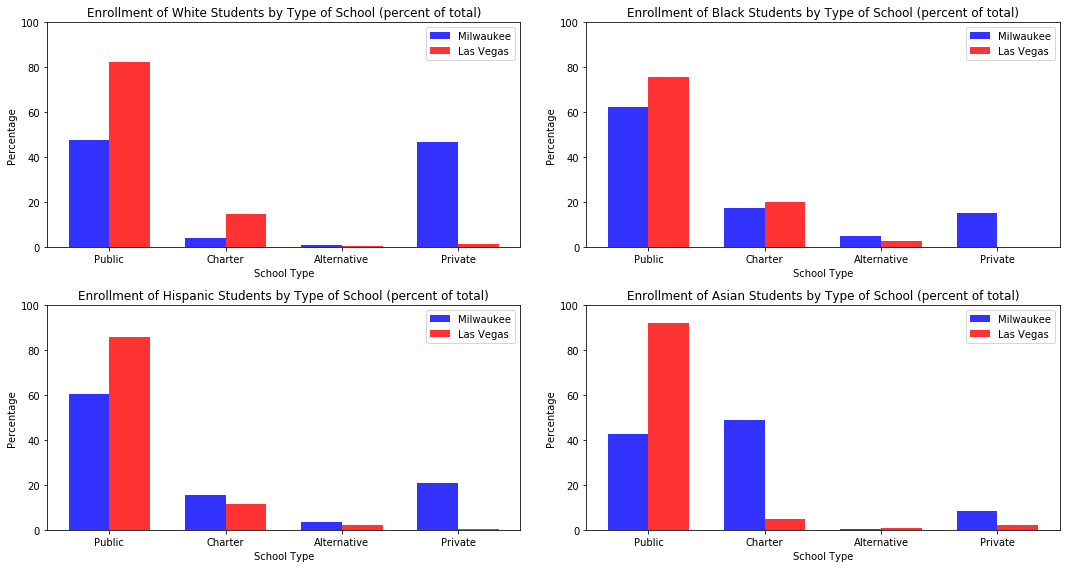

In [63]:
fig, axs = plt.subplots(2, 2, figsize = (15,8)) #, sharey = True)

n_groups = 4

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.8
error_config = {'ecolor': '0.3'}

# subplot 1 (white students)

rects1 = axs[0,0].bar(index, milwaukee_percent_school_by_race['White'].tolist()[:4], bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = axs[0,0].bar(index + bar_width, vegas_percent_school_by_race['White'].tolist()[:4], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Las Vegas')

axs[0,0].set_xlabel('School Type')
axs[0,0].set_ylabel('Percentage')
axs[0,0].set_title('Enrollment of White Students by Type of School (percent of total)')
axs[0,0].set_xticks(index + bar_width / 2)
axs[0,0].set_xticklabels(('Public', 'Charter', 'Alternative', 'Private'))
axs[0,0].set_ylim([0,100])
axs[0,0].legend()

# subplot 2 (black students)

rects1 = axs[0,1].bar(index, milwaukee_percent_school_by_race['Black'].tolist()[:4], bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = axs[0,1].bar(index + bar_width, vegas_percent_school_by_race['Black'].tolist()[:4], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Las Vegas')

axs[0,1].set_xlabel('School Type')
axs[0,1].set_ylabel('Percentage')
axs[0,1].set_ylim([0,100])
axs[0,1].set_title('Enrollment of Black Students by Type of School (percent of total)')
axs[0,1].set_xticks(index + bar_width / 2)
axs[0,1].set_xticklabels(('Public', 'Charter', 'Alternative', 'Private'))
axs[0,1].legend()

# subplot 3 (hispanic students)

rects1 = axs[1,0].bar(index, milwaukee_percent_school_by_race['Hispanic'].tolist()[:4], bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = axs[1,0].bar(index + bar_width, vegas_percent_school_by_race['Hispanic'].tolist()[:4], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Las Vegas')

axs[1,0].set_xlabel('School Type')
axs[1,0].set_ylabel('Percentage')
axs[1,0].set_ylim([0,100])
axs[1,0].set_title('Enrollment of Hispanic Students by Type of School (percent of total)')
axs[1,0].set_xticks(index + bar_width / 2)
axs[1,0].set_xticklabels(('Public', 'Charter', 'Alternative', 'Private'))
axs[1,0].legend()

# subplot 4 (asian students)

rects1 = axs[1,1].bar(index, milwaukee_percent_school_by_race['Asian'].tolist()[:4], bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = axs[1,1].bar(index + bar_width, vegas_percent_school_by_race['Asian'].tolist()[:4], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Las Vegas')

axs[1,1].set_xlabel('School Type')
axs[1,1].set_ylabel('Percentage')
axs[1,1].set_ylim([0,100])
axs[1,1].set_title('Enrollment of Asian Students by Type of School (percent of total)')
axs[1,1].set_xticks(index + bar_width / 2)
axs[1,1].set_xticklabels(('Public', 'Charter', 'Alternative', 'Private'))
axs[1,1].legend()



fig.tight_layout()
plt.show()

plt.close()

From these graphs, we can clearly see the following:
1. White students in Milwaukee enroll in private schools at far higher rates than do white students in Las Vegas. By contrast, white students in Las Vegas enroll in public schools at far higher rates than do those in Milwaukee, which is not surprising given the distribution of the enrollment of the student body as a whole. What is more surprising is that, despite the fact that Milwaukee has roughly double the rate of charter school enrollment as a whole, the percentage of white students enrolled in charter schools in Las Vegas is roughly triple the percentage of white students enrolled in charter schools in Milwaukee.
2. Both Hispanic and Black students in Milwaukee are enrolled in private schools at much higher rates than they are in Las Vegas, where there are virtually no students of any race enrolled in private schools. Conversely, they are enrolled in public school at higher rates in Las Vegas.
3. Black students in Las Vegas enroll in public schools at lower rates than any other race. Black students in Milwaukee enroll in public schools at higher rates than any other race.
4. Asian students in Milwaukee enroll in public schools at even lower rates than do white students, but they enroll in charter schools at much higher rates than any other subgroup.

Next, I want to break down enrollment of each school type in the given cities by race.

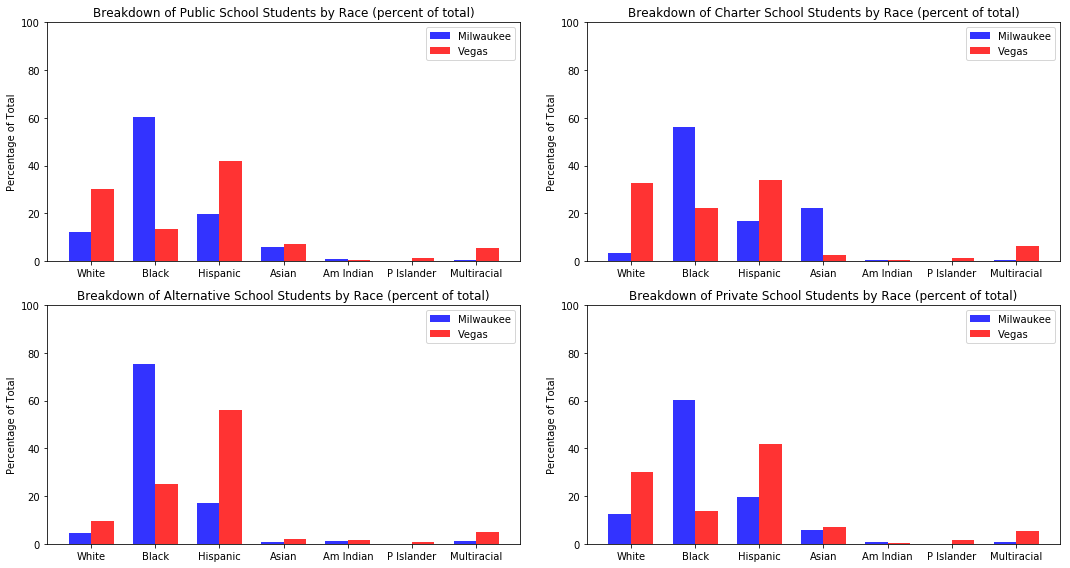

In [64]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))

n_groups = 7

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.8
error_config = {'ecolor': '0.3'}

# subplot 1 (public schools)

rects1 = ax[0,0].bar(index, milwaukee_percent_race_by_school.loc['Public'].tolist()[:7],bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = ax[0,0].bar(index + bar_width, vegas_percent_race_by_school.loc['Public'].tolist()[:7], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Vegas')

ax[0,0].set_ylabel('Percentage of Total')
ax[0,0].set_title('Breakdown of Public School Students by Race (percent of total)')
ax[0,0].set_xticks(index + bar_width / 2)
ax[0,0].set_xticklabels(('White', 'Black', 'Hispanic', 'Asian', 'Am Indian', 'P Islander', 'Multiracial'))
ax[0,0].set_ylim(0,100)
ax[0,0].legend()

# subplot 2 (charter schools)

rects1 = ax[0,1].bar(index, milwaukee_percent_race_by_school.loc['Charter'].tolist()[:7],bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = ax[0,1].bar(index + bar_width, vegas_percent_race_by_school.loc['Charter'].tolist()[:7], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Vegas')

ax[0,1].set_ylabel('Percentage of Total')
ax[0,1].set_title('Breakdown of Charter School Students by Race (percent of total)')
ax[0,1].set_xticks(index + bar_width / 2)
ax[0,1].set_xticklabels(('White', 'Black', 'Hispanic', 'Asian', 'Am Indian', 'P Islander', 'Multiracial'))
ax[0,1].set_ylim(0,100)
ax[0,1].legend()

# subplot 3 (alternative schools)

rects1 = ax[1,0].bar(index, milwaukee_percent_race_by_school.loc['Alternative'].tolist()[:7],bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = ax[1,0].bar(index + bar_width, vegas_percent_race_by_school.loc['Alternative'].tolist()[:7], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Vegas')

ax[1,0].set_ylabel('Percentage of Total')
ax[1,0].set_title('Breakdown of Alternative School Students by Race (percent of total)')
ax[1,0].set_xticks(index + bar_width / 2)
ax[1,0].set_xticklabels(('White', 'Black', 'Hispanic', 'Asian', 'Am Indian', 'P Islander', 'Multiracial'))
ax[1,0].set_ylim(0,100)
ax[1,0].legend()

# subplot 4 (private schools)

rects1 = ax[1,1].bar(index, milwaukee_percent_race_by_school.loc['Public'].tolist()[:7],bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Milwaukee')

rects2 = ax[1,1].bar(index + bar_width, vegas_percent_race_by_school.loc['Public'].tolist()[:7], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Vegas')

ax[1,1].set_ylabel('Percentage of Total')
ax[1,1].set_title('Breakdown of Private School Students by Race (percent of total)')
ax[1,1].set_xticks(index + bar_width / 2)
ax[1,1].set_xticklabels(('White', 'Black', 'Hispanic', 'Asian', 'Am Indian', 'P Islander', 'Multiracial'))
ax[1,1].set_ylim(0,100)
ax[1,1].legend()

fig.tight_layout()
plt.show()

plt.close()

Some observations pertaining to these graphs...

Finally, I would like to compare these breakdowns to the racial breakdowns of these cities in their entireties, as well as to the overall racial breakdowns of their high school populations. First, of course, I need that data. 

Beginning with the high school populations, I have

In [65]:
vegas_race_percents = pd.Series()

races = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Pacific Islander', 'Two Races']

for race in races:
    vegas_race_percents[race] = round(100.0*vegas_count_school_by_race.loc['Total',race]
                                        /vegas_count_school_by_race.loc['Total'].sum(), 1)



In [66]:
vegas_race_percents

White               30.4
Black               15.0
Hispanic            40.8
Asian                6.4
Native American      0.5
Pacific Islander     1.4
Two Races            5.5
dtype: float64

In [67]:
milwaukee_race_percents = pd.Series()

races = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Pacific Islander', 'Two Races']

for race in races:
    milwaukee_race_percents[race] = round(100.0*milwaukee_count_school_by_race.loc['Total',race]
                                        /milwaukee_count_school_by_race.loc['Total'].sum(), 1)


In [68]:
milwaukee_race_percents

White               15.0
Black               56.0
Hispanic            19.0
Asian                7.9
Native American      0.7
Pacific Islander     0.1
Two Races            1.2
dtype: float64

OK, so what do I want here as far as bar graphs go? I think that I want two separate graphs, one for each city. Then, for each graph I want a graph of the racial breakdown of each type of school as well as the racial breakdown of the high school population as a whole. And, I think, I might want a racial breakdown of the city population as a whole, in part because, looking at this high school breakdown for Milwaukee, it looks very different from what I would have expected. For that, I need to use population data, which I have from the US census.

In [69]:
milwaukee_city_demographics = pd.read_csv('Education_Project/Milwaukee_city_demographics.csv')
vegas_city_demographics = pd.read_csv('Education_Project/Las_Vegas_city_demographics.csv')

In [70]:
milwaukee_city_demographics

,GEO.id,Id,1600000US5553000
0,GEO.id2,Id2,5553000
1,GEO.display-label,Geography,"Milwaukee city, Wisconsin"
2,HD01_VD01,Estimate; Total:,599086
3,HD02_VD01,Margin of Error; Total:,55
4,HD01_VD02,Estimate; Not Hispanic or Latino:,488698
5,HD02_VD02,Margin of Error; Not Hispanic or Latino:,1414
6,HD01_VD03,Estimate; Not Hispanic or Latino: - White alone,214553
7,HD02_VD03,Margin of Error; Not Hispanic or Latino: - Whi...,1702
8,HD01_VD04,Estimate; Not Hispanic or Latino: - Black or A...,230599
9,HD02_VD04,Margin of Error; Not Hispanic or Latino: - Bla...,1860


Looking at this, it is obvious that I don't need all of this data. I need the following data from ```milwaukee_city_demographics```:
- Total Population: row 2
- White (non Hispanic): row 6
- Black (non Hispanic): row 8
- Asian (non Hispanic): row 12
- Native American (non Hispanic): row 10
- Pacific Islander (non Hispanic): row 14
- Hispanic (all races): row 24
- Two or more races (non Hispanic): row 18

Since this should be the same for ```vegas_city_population```, I can then trivially produce the dataframes ```milwaukee_population``` and ```vegas_population```

In [71]:
# population breakdown for vegas

vegas_population = pd.DataFrame(columns = ['White','Black','Hispanic','Asian','Native American',
                                              'Pacific Islander','Two Races'], index = ['Count', 'Percent'])

vegas_population.loc['Count','White'] = int(vegas_city_demographics.iloc[6, 2])
vegas_population.loc['Percent','White'] = round(100.0*int(vegas_city_demographics.iloc[6,2])
                                               /int(vegas_city_demographics.iloc[2,2]), 1)

vegas_population.loc['Count','Black'] = int(vegas_city_demographics.iloc[8, 2])
vegas_population.loc['Percent','Black'] = round(100.0*int(vegas_city_demographics.iloc[8,2])
                                               /int(vegas_city_demographics.iloc[2,2]), 1)

vegas_population.loc['Count','Hispanic'] = int(vegas_city_demographics.iloc[24, 2])
vegas_population.loc['Percent','Hispanic'] = round(100.0*int(vegas_city_demographics.iloc[24,2])
                                               /int(vegas_city_demographics.iloc[2,2]), 1)

vegas_population.loc['Count','Asian'] = int(vegas_city_demographics.iloc[12, 2])
vegas_population.loc['Percent','Asian'] = round(100.0*int(vegas_city_demographics.iloc[12,2])
                                               /int(vegas_city_demographics.iloc[2,2]), 1)

vegas_population.loc['Count','Native American'] = int(vegas_city_demographics.iloc[10, 2])
vegas_population.loc['Percent','Native American'] = round(100.0*int(vegas_city_demographics.iloc[10,2])
                                               /int(vegas_city_demographics.iloc[2,2]), 1)

vegas_population.loc['Count','Pacific Islander'] = int(vegas_city_demographics.iloc[14, 2])
vegas_population.loc['Percent','Pacific Islander'] = round(100.0*int(vegas_city_demographics.iloc[14,2])
                                               /int(vegas_city_demographics.iloc[2,2]), 1)

vegas_population.loc['Count','Two Races'] = int(vegas_city_demographics.iloc[18, 2])
vegas_population.loc['Percent','Two Races'] = round(100.0*int(vegas_city_demographics.iloc[18,2])
                                               /int(vegas_city_demographics.iloc[2,2]), 1)



In [72]:
# And for milwaukee

milwaukee_population = pd.DataFrame(columns = ['White','Black','Hispanic','Asian','Native American',
                                              'Pacific Islander','Two Races'], index = ['Count', 'Percent'])

milwaukee_population.loc['Count','White'] = int(milwaukee_city_demographics.iloc[6, 2])
milwaukee_population.loc['Percent','White'] = round(100.0*int(milwaukee_city_demographics.iloc[6,2])
                                               /int(milwaukee_city_demographics.iloc[2,2]), 1)

milwaukee_population.loc['Count','Black'] = int(milwaukee_city_demographics.iloc[8, 2])
milwaukee_population.loc['Percent','Black'] = round(100.0*int(milwaukee_city_demographics.iloc[8,2])
                                               /int(milwaukee_city_demographics.iloc[2,2]), 1)

milwaukee_population.loc['Count','Hispanic'] = int(milwaukee_city_demographics.iloc[24, 2])
milwaukee_population.loc['Percent','Hispanic'] = round(100.0*int(milwaukee_city_demographics.iloc[24,2])
                                               /int(milwaukee_city_demographics.iloc[2,2]), 1)

milwaukee_population.loc['Count','Asian'] = int(milwaukee_city_demographics.iloc[12, 2])
milwaukee_population.loc['Percent','Asian'] = round(100.0*int(milwaukee_city_demographics.iloc[12,2])
                                               /int(milwaukee_city_demographics.iloc[2,2]), 1)

milwaukee_population.loc['Count','Native American'] = int(milwaukee_city_demographics.iloc[10, 2])
milwaukee_population.loc['Percent','Native American'] = round(100.0*int(milwaukee_city_demographics.iloc[10,2])
                                               /int(milwaukee_city_demographics.iloc[2,2]), 1)

milwaukee_population.loc['Count','Pacific Islander'] = int(milwaukee_city_demographics.iloc[14, 2])
milwaukee_population.loc['Percent','Pacific Islander'] = round(100.0*int(milwaukee_city_demographics.iloc[14,2])
                                               /int(milwaukee_city_demographics.iloc[2,2]), 1)

milwaukee_population.loc['Count','Two Races'] = int(milwaukee_city_demographics.iloc[18, 2])
milwaukee_population.loc['Percent','Two Races'] = round(100.0*int(milwaukee_city_demographics.iloc[18,2])
                                               /int(milwaukee_city_demographics.iloc[2,2]), 1)




In [73]:
vegas_population

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Count,275845,72870,203054,40497,2413,4045,20943
Percent,44.4,11.7,32.7,6.5,0.4,0.7,3.4


In [74]:
milwaukee_population

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Count,214553,230599,110388,23730,2577,66,16422
Percent,35.8,38.5,18.4,4,0.4,0,2.7


So without even looking at any graphs, one can see tha that the racial demographics of the cities' populations as a whole are considerably whiter than the racial demographics of the cities' high school populations, even including private schools (and while homeschooling may account for some of this difference, at roughly 14000 total homeschoolers for Nevada and 20000 total homeschoolers for Wisconsin, this is surely not enough to account for all of the difference, even assuming that all homeschooled students are white.)

Next we produce two dataframes, ```vegas_race_summary``` and ```milwaukee_race_summary``` that consist of rows for city population and total high school population, as well as for each of the types of high schools that we are studying. For each row, the data frame then has columns that give the percentage of the given population that is of a specified race or ethnicity. 

In [75]:
milwaukee_race_percents

White               15.0
Black               56.0
Hispanic            19.0
Asian                7.9
Native American      0.7
Pacific Islander     0.1
Two Races            1.2
dtype: float64

In [76]:
vegas_race_summary = pd.DataFrame(columns = ['White','Black','Hispanic','Asian','Native American',
                                             'Pacific Islander','Two Races'], 
                                  index = ['Population', 'High School', 'Public','Charter','Alternative',
                                           'Private'])
races = ['White','Black','Hispanic','Asian','Native American','Pacific Islander','Two Races']
school_types = ['Public','Charter','Alternative','Private']

for race in races:
    vegas_race_summary.loc['Population',race] = vegas_population.loc['Percent',race]
    vegas_race_summary.loc['High School',race] = vegas_race_percents[race]

for race in races:
    for school_type in school_types:
        vegas_race_summary.loc[school_type, race] = vegas_percent_race_by_school.loc[school_type, race]


In [77]:
vegas_race_summary

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Population,44.4,11.7,32.7,6.5,0.4,0.7,3.4
High School,30.4,15,40.8,6.4,0.5,1.4,5.5
Public,30.1,13.6,42,7,0.5,1.4,5.4
Charter,32.7,22.2,34.2,2.4,0.7,1.4,6.5
Alternative,9.5,25.2,56.2,2.2,1.4,0.6,4.8
Private,64.1,3.8,10.1,17.4,0,1,3.5


In [78]:
milwaukee_race_summary = pd.DataFrame(columns = ['White','Black','Hispanic','Asian','Native American',
                                             'Pacific Islander','Two Races'], 
                                  index = ['Population', 'High School', 'Public','Charter','Alternative',
                                           'Private'])
races = ['White','Black','Hispanic','Asian','Native American','Pacific Islander','Two Races']
school_types = ['Public','Charter','Alternative','Private']

for race in races:
    milwaukee_race_summary.loc['Population',race] = milwaukee_population.loc['Percent',race]
    milwaukee_race_summary.loc['High School',race] = milwaukee_race_percents[race]

for race in races:
    for school_type in school_types:
        milwaukee_race_summary.loc[school_type, race] = milwaukee_percent_race_by_school.loc[school_type, race]



In [79]:
milwaukee_race_summary

,White,Black,Hispanic,Asian,Native American,Pacific Islander,Two Races
Population,35.8,38.5,18.4,4,0.4,0,2.7
High School,15,56,19,7.9,0.7,0.1,1.2
Public,12.4,60.3,19.8,5.8,0.8,0.1,0.7
Charter,3.4,56.2,16.8,22.4,0.6,0.2,0.4
Alternative,4.6,75.5,17,0.7,1,0,1.1
Private,33.7,40.6,18.8,3.1,0.4,0,3.3


Finally, we use a collection of bar graphs to investigate the population wide distributions.

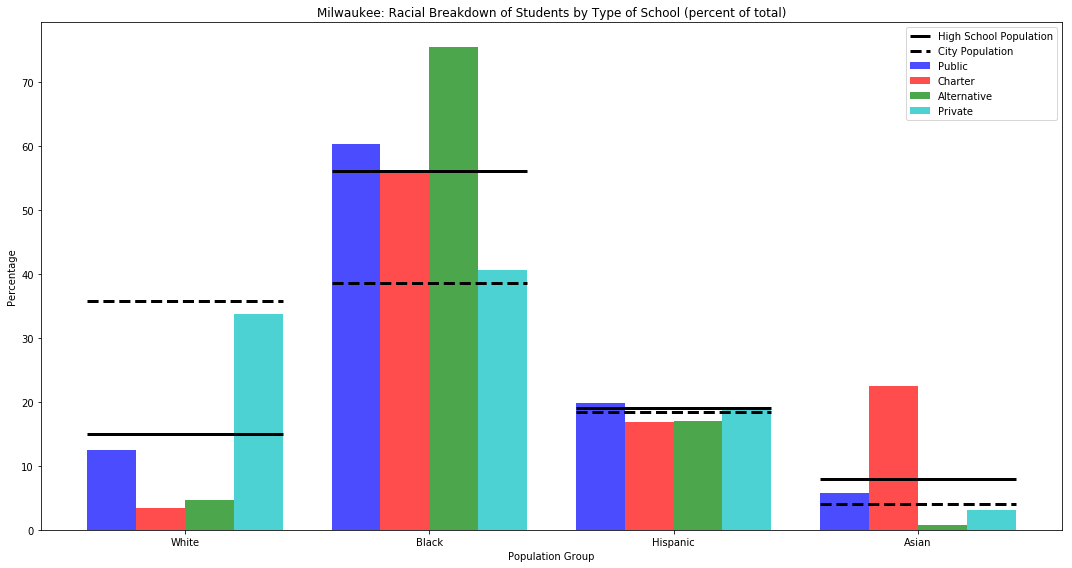

In [80]:
n_groups = 4

fig, ax = plt.subplots(figsize = (15,8))

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, milwaukee_race_summary.loc['Public'].tolist()[:4], bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Public')

rects2 = ax.bar(index + bar_width, milwaukee_race_summary.loc['Charter'].tolist()[:4], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Charter')

rects3 = ax.bar(index + 2*bar_width, milwaukee_race_summary.loc['Alternative'].tolist()[:4], bar_width,
                alpha=opacity, color='g', error_kw=error_config, label='Alternative')

rects4 = ax.bar(index + 3*bar_width, milwaukee_race_summary.loc['Private'].tolist()[:4], bar_width,
                alpha=opacity, color='c', error_kw=error_config, label='Private')

ax.hlines(milwaukee_race_summary.loc['High School'].tolist()[:4], index-bar_width/2, index+7*bar_width/2, 
          color = 'k', linewidth = 3, label = 'High School Population')
ax.hlines(milwaukee_race_summary.loc['Population'].tolist()[:4], index-bar_width/2, index + 7*bar_width/2, 
          color = 'k', linestyle = '--', linewidth = 3, label = 'City Population')

ax.set_xlabel('Population Group')
ax.set_ylabel('Percentage')
ax.set_title('Milwaukee: Racial Breakdown of Students by Type of School (percent of total)')
ax.set_xticks(index + 3*bar_width / 2)
# I want to include population sizes in these labels I think...
ax.set_xticklabels(('White', 'Black', 'Hispanic','Asian','Native American','Pacific Islander','Multiracial'))
ax.legend()

fig.tight_layout()
plt.show()
plt.close()

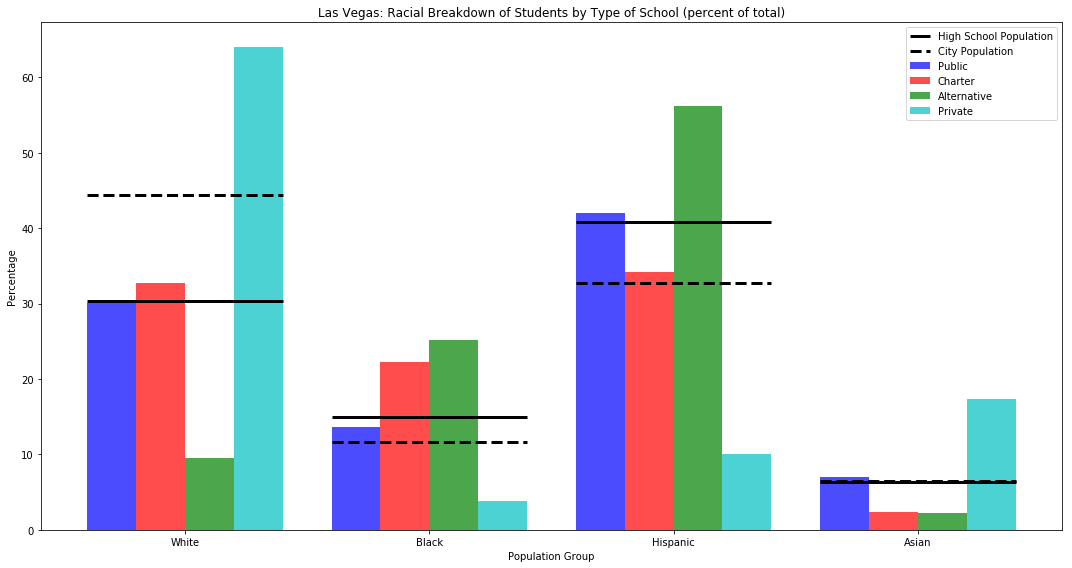

In [81]:
n_groups = 4

fig, ax = plt.subplots(figsize = (15,8))

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, vegas_race_summary.loc['Public'].tolist()[:4], bar_width,
                alpha=opacity, color='b', error_kw=error_config, label='Public')

rects2 = ax.bar(index + bar_width, vegas_race_summary.loc['Charter'].tolist()[:4], bar_width,
                alpha=opacity, color='r', error_kw=error_config, label='Charter')

rects3 = ax.bar(index + 2*bar_width, vegas_race_summary.loc['Alternative'].tolist()[:4], bar_width,
                alpha=opacity, color='g', error_kw=error_config, label='Alternative')

rects4 = ax.bar(index + 3*bar_width, vegas_race_summary.loc['Private'].tolist()[:4], bar_width,
                alpha=opacity, color='c', error_kw=error_config, label='Private')

ax.hlines(vegas_race_summary.loc['High School'].tolist()[:4], index-bar_width/2, index+7*bar_width/2, 
          color = 'k', linewidth = 3, label = 'High School Population')
ax.hlines(vegas_race_summary.loc['Population'].tolist()[:4], index-bar_width/2, index + 7*bar_width/2, 
          color = 'k', linestyle = '--', linewidth = 3, label = 'City Population')

ax.set_xlabel('Population Group')
ax.set_ylabel('Percentage')
ax.set_title('Las Vegas: Racial Breakdown of Students by Type of School (percent of total)')
ax.set_xticks(index + 3*bar_width / 2)
# I want to include population sizes in these labels I think...
ax.set_xticklabels(('White', 'Black', 'Hispanic','Asian','Native American','Pacific Islander','Multiracial'))
ax.legend()

fig.tight_layout()
plt.show()
plt.close()

### Question 3: How does access to advanced placement (AP) exams and success rates on AP exams in Milwaukee and Las Vegas compare to access and success on AP exams at a national level?

Here, I will use the following set of data collections:
1. Milwaukee_AP_courses.csv
2. Las_Vegas_AP_courses.csv
4. AP_tests_by_race_2013.csv
8. 2013_enrollments.csv
9. 2013_national.csv

Note that here I have only data on publicly funded schools, i.e., those schools that are public, charter, alternative, or other in my list of schools. 

In [82]:
milwaukee_ap = pd.read_csv('Education_Project/Milwaukee_AP_courses.csv')
vegas_ap = pd.read_csv('Education_Project/Las_Vegas_AP_courses.csv')
ap_tests = pd.read_csv('Education_project/AP_tests_by_race_2013.csv')
schools_2013 = pd.read_csv('Education_Project/2013_enrollments.csv')

Here, we begin by compiling our data for the national population of high school seniors, beginning with those enrolled in public schools.

In [83]:
f = open('Education_Project/2013_national.csv', 'r', encoding = 'latin-1')
x = f.readlines()
f.close()

In [84]:
for i in range(len(x)):
    if len(x[i].split(',')) < 309:
        temp = x[i].split(',')
        while len(temp) < 309:
            temp.insert(306, '-2')
        x[i] = ",".join(temp)
    elif len(x[i].split(',')) > 309:
        temp = x[i].split(',')
        while len(temp) > 309:
            temp = temp[:-1]
        temp[-1] = "".join([temp[-1], '\n'])
        x[i] = ','.join(temp)

In [85]:
# converting my data into a dataframe

national_enrollments = []

for i in range(1,len(x)):
    national_enrollments.append(x[i].split(","))
    
national_enrollments = pd.DataFrame(national_enrollments, columns = x[0].split(","))

# and restricting to 12th grade enrollment

national_enrollments_12 = national_enrollments[['NCESSCH','G12', 'AM12M', 'AM12F', 'AS12M', 'AS12F', 'HI12M', 'HI12F', 'BL12M', 
 'BL12F', 'WH12M', 'WH12F', 'HP12M', 'HP12F', 'TR12M', 'TR12F']]

national_enrollments_12.head(15)

,NCESSCH,G12,AM12M,AM12F,AS12M,AS12F,HI12M,HI12F,BL12M,BL12F,WH12M,WH12F,HP12M,HP12F,TR12M,TR12F
0,010000200277,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,010000201402,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,010000201667,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,010000201670,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,010000201705,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,010000201706,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,010000201876,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
7,010000500870,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
8,010000500871,243,0,0,0,1,26,24,2,6,101,82,0,0,1,0
9,010000500879,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In looking at this data, we note that there are a number of schools for which the value of 'G12' is either -2 (corresponding to schools that do not have a twelth grade) or -1 (corresponding to schools for which no value was reported). In the first case, it is clear that these schools have nothing to contribute to our data on high school enrollment. In the second case, a quick inspection of the data suggests that these consist largely of schools in carceral institutions, which are unlikely to account for large numbers of students, and which, in addition, have student populations that are heavily in flux. For this reason, we will simply ignore all of these schools.

In [86]:
national_enrollments_12 = national_enrollments_12[national_enrollments_12['G12'] != '-2']

national_enrollments_12 = national_enrollments_12[national_enrollments_12['G12'] != '-1']
national_enrollments_12.reset_index(drop = True, inplace = True)

national_enrollments_12.head(10)

,NCESSCH,G12,AM12M,AM12F,AS12M,AS12F,HI12M,HI12F,BL12M,BL12F,WH12M,WH12F,HP12M,HP12F,TR12M,TR12F
0,010000500871,243,0,0,0,1,26,24,2,6,101,82,0,0,1,0
1,010000600872,49,0,0,0,0,2,3,0,0,22,22,0,0,0,0
2,010000600878,119,0,0,0,0,15,12,2,1,38,51,0,0,0,0
3,010000600883,112,0,1,0,0,0,0,0,0,64,47,0,0,0,0
4,010000601585,85,0,0,0,0,1,1,0,0,42,41,0,0,0,0
5,010000700251,612,0,0,18,12,17,13,73,88,188,190,0,1,5,7
6,010000700337,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,010000701456,363,0,0,3,3,2,5,44,36,128,138,1,0,1,2
8,010000800831,668,4,4,21,30,15,13,62,61,218,235,0,1,2,2
9,010000802198,92,0,1,3,1,2,2,14,21,29,17,0,0,2,0


Finally, I can sum this data to produce racial distribution data for the nation as a whole.

In [87]:
"""
Function:

Inputs:

Returns:
"""


def string_to_float(string):
    
    split_str = string.split(",")
    
    value = 0
    for j in range(1, len(split_str)+1):
        value += 1000**(j-1)*float(split_str[-1*j])
    
    return value

In [88]:
races = ['G12', 'AM12M', 'AM12F', 'AS12M', 'AS12F', 'HI12M', 'HI12F', 
                    'BL12M', 'BL12F', 'WH12M', 'WH12F', 'HP12M', 'HP12F', 'TR12M', 'TR12F']

enrollments_2013 = {'G1':0, 'AM12':0, 'AS12':0, 'HI12':0, 'BL12':0, 'WH12':0, 'HP12':0, 'TR12':0}

for i in range(len(national_enrollments_12)):
    for race in races:
        enrollments_2013[race[:-1]] += string_to_float(national_enrollments_12.loc[i,race])
    
enrollments_2013

{'G1': 3457168.0,
 'AM12': 69587.0,
 'AS12': 179197.0,
 'HI12': 762482.0,
 'BL12': 523636.0,
 'WH12': 1891132.0,
 'HP12': 24895.0,
 'TR12': 70446.0}

### A question of access

I believe that the data that I have for AP test access from the College Board is for students in all types of schools, most importantly, the data includes tests taken by students at private schools. For obvious reasons, this is somewhat of a problem, given that there are a not insubstantial number of private school graduates each year. For this reason, I'm going to take a stab at accounting for these private school students when calculating access for the nation as a whole. I intend to use data from [private high school graduates from 2013](https://nces.ed.gov/surveys/pss/tables/table_2013_15.asp), which indicates that there were a total of 308,766 graduates from private high schools. In addition, [need link name](https://nces.ed.gov/surveys/pss/tables/table_2013_09.asp) and [need another link name](https://nces.ed.gov/surveys/pss/tables/table_2013_13.asp) combine to give me some indication of what the racial breakdown of these graduates might be. In particular, from the latter I know that 171,812 students graduated from secondary schools and 136,953 students graduated from combined elementary/secondary schools. From the former, I know something about the racial distributions of students in these types of schools, which I will assume are relatively consistant from class to class. 

|Type of School|Hispanic|Native American|Asian|Black|Pacific Islander|White|Two or more races|
|---|---|---|---|---|---|---|---|
|Secondary|11.4| 0.4| 6.2| 9.7| 0.5| 68.3| 3.7| 
|Combined|7.4 |0.6 |6.1| 9.3| 0.9| 72.2| 3.6|

From here I intend to estimate the number of graduating seniors of each race and add this data to the public school figures.

In [89]:
private_school_graduates = {'Hispanic': 0, 'Native American': 0, 'Asian': 0, 'Black': 0, 'Pacific Islander': 0,
                            'White': 0, 'Two or more races': 0} 

private_school_graduates['Hispanic'] = round(171812*0.114 + 136953 * 0.074)
private_school_graduates['Native American'] = round(171812*0.004 + 136953 * 0.006)
private_school_graduates['Asian'] = round(171812*0.062 + 136953 * 0.061)
private_school_graduates['Black'] = round(171812*0.097 + 136953 * 0.093)
private_school_graduates['Pacific Islander'] = round(171812*0.005 + 136953 * 0.009)
private_school_graduates['White'] = round(171812*0.683 + 136953 * 0.722)
private_school_graduates['Two or more races'] = round(171812*0.037 + 136953 * 0.036)

In [90]:
total_seniors = {}

total_seniors['Hispanic'] = (private_school_graduates['Hispanic'] + enrollments_2013['HI12'])
total_seniors['Native American'] = (private_school_graduates['Native American'] + enrollments_2013['AM12'])
total_seniors['Asian'] = (private_school_graduates['Asian'] + enrollments_2013['AS12'])
total_seniors['Black'] = (private_school_graduates['Black'] + enrollments_2013['BL12'])
total_seniors['Pacific Islander'] = (private_school_graduates['Pacific Islander'] + enrollments_2013['HP12'])
total_seniors['White'] = (private_school_graduates['White'] + enrollments_2013['WH12'])
total_seniors['Two or more races'] = (private_school_graduates['Two or more races'] + enrollments_2013['TR12'])
total_seniors['Total'] = 308766 + enrollments_2013['G1']

In [91]:
total_seniors

{'Hispanic': 792203.0,
 'Native American': 71096.0,
 'Asian': 198203.0,
 'Black': 553038.0,
 'Pacific Islander': 26987.0,
 'White': 2107360.0,
 'Two or more races': 81733.0,
 'Total': 3765934.0}

My next task is to summarize the data for AP testing rates and AP pass rates at the national level. For this, I will use the dataframe ```ap_tests``` to produce a summary dataframe.

In [92]:
ap_tests.head(12)

,Appendix C: AP Exams Taken in U.S. Public Schools by the Class of 2013,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Number of Exam Takers, by Subject and Score Point",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ethnicity,AP Score,Total Exams,Art History,Biology,Calculus AB,Calculus BC,Chemistry,Chinese Language and Culture,Comparative Government and Politics,Computer Science A,English Language and Composition,English Literature and Composition,Environmental Science,European History,French Language and Culture,German Language and Culture,Human Geography,Italian Language and Culture,Japanese Language and Culture,Latin,Macroeconomics,Microeconomics,Music Theory,Physics B,Physics C: Electricity and Magnetism,Physics C: Mechanics,Psychology,Spanish Language,Spanish Literature and Culture,Statistics,Studio Art: 2-D Design,Studio Art: 3-D Design,Studio Art: Drawing,United States Government and Politics,United States History,World History,Number of Students,NaN
3,American Indian/Alaska Native,5,"1,123",6,38,145,88,35,2,2,18,118,67,27,19,5,1,22,*,2,3,25,16,7,19,3,18,126,13,0,40,16,4,8,78,107,45,NaN,NaN
4,NaN,4,"2,365",8,103,154,45,59,0,9,20,342,249,97,50,8,2,50,*,0,1,54,42,11,49,7,29,226,20,3,119,43,1,12,128,298,126,NaN,NaN
5,NaN,3,"3,898",26,199,191,59,113,1,14,16,773,586,81,108,16,8,72,*,1,3,59,30,13,71,7,39,202,42,3,138,57,7,48,248,442,225,NaN,NaN
6,NaN,2,"4,691",20,230,155,28,99,0,22,8,923,872,135,65,18,3,66,*,1,4,76,32,34,59,17,38,150,42,1,147,35,7,20,341,736,306,NaN,NaN
7,NaN,1,"4,530",18,262,534,85,233,2,13,53,455,333,171,159,3,1,145,*,1,4,127,52,16,104,13,38,241,54,0,209,7,1,5,311,556,324,NaN,NaN
8,NaN,Total,"16,607",78,832,"1,179",305,539,5,60,115,"2,611","2,107",511,401,50,15,355,1,5,15,341,172,81,302,47,162,945,171,7,653,158,20,93,"1,106","2,139","1,026","\t6,336",NaN
9,NaN,Mean Grade,\t2.45,\t2.54,\t2.31,\t2.34,\t3.08,\t2.19,\t3.00,\t2.42,\t2.50,\t2.52,\t2.45,\t2.36,\t2.26,\t2.88,\t2.93,\t2.26,*,\t3.20,\t2.67,\t2.34,\t2.64,\t2.49,\t2.40,\t2.36,\t2.70,\t2.84,\t2.39,\t3.29,\t2.44,\t3.16,\t3.00,\t2.98,\t2.39,\t2.38,\t2.28,NaN,NaN


To begin with, observe that the top few rows here are garbage, and can be deleted. In addition, my city data does not have data on AP testing broken up by subject, which means that the only columns that are useful to me are
- column 1, which contains data on ethnicity
- column 2, which contains scores (and therefore is necessary to determine pass rates)
- column 3, which contains information on total exams taken (divided by race and score)
- column 35, which contains information on the total number of students of each race taking AP exams.

In [93]:
ap_tests.columns = ap_tests.loc[2]

ap_tests.drop([0,1,2], inplace = True, axis = 0)

ap_tests.reset_index(inplace = True, drop = True)

ap_tests.head(10)

2,Ethnicity,AP Score,Total Exams,Art History,Biology,Calculus AB,Calculus BC,Chemistry,Chinese Language and Culture,Comparative Government and Politics,Computer Science A,English Language and Composition,English Literature and Composition,Environmental Science,European History,French Language and Culture,German Language and Culture,Human Geography,Italian Language and Culture,Japanese Language and Culture,Latin,Macroeconomics,Microeconomics,Music Theory,Physics B,Physics C: Electricity and Magnetism,Physics C: Mechanics,Psychology,Spanish Language,Spanish Literature and Culture,Statistics,Studio Art: 2-D Design,Studio Art: 3-D Design,Studio Art: Drawing,United States Government and Politics,United States History,World History,Number of Students,nan
0,American Indian/Alaska Native,5,"1,123",6,38,145,88,35,2,2,18,118,67,27,19,5,1,22,*,2,3,25,16,7,19,3,18,126,13,0,40,16,4,8,78,107,45,NaN,NaN
1,NaN,4,"2,365",8,103,154,45,59,0,9,20,342,249,97,50,8,2,50,*,0,1,54,42,11,49,7,29,226,20,3,119,43,1,12,128,298,126,NaN,NaN
2,NaN,3,"3,898",26,199,191,59,113,1,14,16,773,586,81,108,16,8,72,*,1,3,59,30,13,71,7,39,202,42,3,138,57,7,48,248,442,225,NaN,NaN
3,NaN,2,"4,691",20,230,155,28,99,0,22,8,923,872,135,65,18,3,66,*,1,4,76,32,34,59,17,38,150,42,1,147,35,7,20,341,736,306,NaN,NaN
4,NaN,1,"4,530",18,262,534,85,233,2,13,53,455,333,171,159,3,1,145,*,1,4,127,52,16,104,13,38,241,54,0,209,7,1,5,311,556,324,NaN,NaN
5,NaN,Total,"16,607",78,832,"1,179",305,539,5,60,115,"2,611","2,107",511,401,50,15,355,1,5,15,341,172,81,302,47,162,945,171,7,653,158,20,93,"1,106","2,139","1,026","\t6,336",NaN
6,NaN,Mean Grade,\t2.45,\t2.54,\t2.31,\t2.34,\t3.08,\t2.19,\t3.00,\t2.42,\t2.50,\t2.52,\t2.45,\t2.36,\t2.26,\t2.88,\t2.93,\t2.26,*,\t3.20,\t2.67,\t2.34,\t2.64,\t2.49,\t2.40,\t2.36,\t2.70,\t2.84,\t2.39,\t3.29,\t2.44,\t3.16,\t3.00,\t2.98,\t2.39,\t2.38,\t2.28,NaN,NaN
7,Asian/Asian American/Pacific Islander,5,"103,454",383,"6,913","11,099","11,924","6,058","3,913",570,"1,943","7,629","4,274","1,627","1,786",330,44,"1,391",3,456,127,"2,883","2,149",598,"2,693","1,406","2,655","7,543","1,146",83,"5,022",361,31,418,"4,002","8,470","3,524",NaN,NaN
8,NaN,4,"106,940",689,"7,001","7,041","3,513","5,691",725,548,"1,639","10,749","8,199","3,375","2,762",540,88,"1,864",21,104,123,"4,493","3,077",462,"2,888","1,054","2,099","7,320","1,635",126,"6,031",653,47,421,"4,599","12,110","5,253",NaN,NaN
9,NaN,3,"109,776",769,"7,606","6,515","3,624","4,931",413,432,922,"13,520","11,978","2,123","4,468",709,86,"1,725",27,216,190,"2,889","1,855",474,"3,728",590,"1,572","4,783","1,499",104,"5,821",608,102,608,"7,945","10,229","6,715",NaN,NaN


Now, looking at this dataframe, we see that there's a lot of interesting data here, but that doesn't have any analogue in our city data, so we might as well get rid of the data on both the types of tests and the individual scores on those tests. We want to keep the data in the columns "Number of Students" and "Total Exams" as well as "AP Score" (which gives us some idea of the pass rate for each ethnicity) and "Ethnicity". This can then be reorganized into a more useful dataframe of the form:

| Ethnicity|Students|Total Exams|Exams Passed|Exams Failed|Pass Rate|
|----------|--------|-----------|------------|------------|---------|
|Native American|---|---|---|---|---|
|Asian/ Pacific Islander|---|---|---|---|---|
|Black|---|---|---|---|---|
|White|---|---|---|---|---|
|Hispanic|---|---|---|---|---|
|Other|---|---|---|---|---|
|No Response|---|---|---|---|---|
|Total|---|---|---|---|---|

One observation is that, because the Hispanic population in this data set is divided into subcategories (which we don't have for either of our city datasets), we need to combine those pieces of the dataframe in order to get what we want.

In [94]:
ap_tests = ap_tests[[u'Ethnicity', u'AP Score',u'Total Exams', u'Number of Students']]

In [95]:
"""
Function:

Inputs:

Returns:
"""


def ap(n):
    passed = (string_to_float(ap_tests.loc[n, 'Total Exams']) + 
              string_to_float(ap_tests.loc[n+1, 'Total Exams']) + 
              string_to_float(ap_tests.loc[n+2, 'Total Exams']))
    
    failed = (string_to_float(ap_tests.loc[n+3, 'Total Exams']) +
              string_to_float(ap_tests.loc[n+4, 'Total Exams']))
    
    students = string_to_float(ap_tests.loc[n+5, 'Number of Students'])
    
    total_exams = passed + failed
    
    pass_rate = round(passed/total_exams*100,1)
    
    return [students, total_exams, passed, failed, pass_rate]

In [96]:
ap_by_ethnicity = pd.DataFrame(0, columns = ['Students','Total Exams',
                                             'Exams Passed','Exams Failed','Pass Rate'],
                                  index = ['Native American', 'Asian/ Pacific Islander', 'Black', 'White',
                                           'Hispanic', 'Other', 'No Response', 'Total'])

ap_by_ethnicity.loc['Native American'] = ap(0)
ap_by_ethnicity.loc['Asian/ Pacific Islander'] = ap(7)
ap_by_ethnicity.loc['Black'] = ap(14)
ap_by_ethnicity.loc['White'] = ap(42)
ap_by_ethnicity.loc['Other'] = ap(49)
ap_by_ethnicity.loc['No Response'] = ap(56)
ap_by_ethnicity.loc['Total'] = ap(63)

# And to combine for the Hispanic students

h1 = ap(21) # Mexican
h2 = ap(28) # Puerto Rican
h3 = ap(35) # Other Hispanic
h0 = [0,0,0,0,0]
for i in range(4):
    h0[i] = h1[i] + h2[i] + h3[i]
    
h0[4] = round(h0[2]/h0[1]*100,1)

ap_by_ethnicity.loc['Hispanic'] = h0

In [97]:
ap_by_ethnicity

,Students,Total Exams,Exams Passed,Exams Failed,Pass Rate
Native American,6336.0,16607.0,7386.0,9221.0,44.5
Asian/ Pacific Islander,107838.0,474183.0,320170.0,154013.0,67.5
Black,92406.0,233631.0,66407.0,167224.0,28.4
White,561096.0,1761082.0,1122144.0,638938.0,63.7
Hispanic,188514.0,536993.0,221539.0,315454.0,41.3
Other,32183.0,107394.0,60881.0,46513.0,56.7
No Response,15057.0,23124.0,8499.0,14625.0,36.8
Total,1003430.0,3153014.0,1807026.0,1345988.0,57.3


Now that we have organized our data at the national level, we pass to the city level. To begin, we restrict to data from the year 2013 for each of our two cities.

In [98]:
milwaukee_ap = milwaukee_ap.loc[milwaukee_ap['Year'] == 2013]
milwaukee_ap.reset_index(drop = True, inplace = True)
vegas_ap = vegas_ap.loc[vegas_ap['Year'] == 2013]
vegas_ap.reset_index(drop = True, inplace = True)

Now, as before, we want to restrict to those schools that were actually located in the cities themselves. For this, we use the data found in ```schools_2013``` which contains data about the location codes for every school in Wisconsin or Nevada that was open in 2013.

In [99]:
schools_2013 = schools_2013.loc[schools_2013['ULOCAL'] == 11]

vegas_2013_schools = schools_2013.loc[(schools_2013['LCITY'] == 'LAS VEGAS')]

vegas_2013_schools = vegas_2013_schools.loc[(vegas_2013_schools['G12OFFRD'] == 1)]

vegas_2013_schools.reset_index(inplace = True, drop = True)

milwaukee_2013_schools = schools_2013.loc[(schools_2013['LCITY'] == 'MILWAUKEE')]

milwaukee_2013_schools = milwaukee_2013_schools.loc[(milwaukee_2013_schools['G12OFFRD'] == 1)]

milwaukee_2013_schools.reset_index(inplace = True, drop = True)


Now, for the data that I have, I want to take only those schools that appear in the above lists of public schools located in the city itself.

In [100]:
milwaukee_2013_school_codes = milwaukee_2013_schools['NCESSCH'].tolist()

vegas_2013_school_codes = vegas_2013_schools['NCESSCH'].tolist()

In [101]:
to_keep = []
for j in range(len(vegas_ap)):
    if vegas_ap.loc[j,'ID'] in vegas_2013_school_codes:
        to_keep.append(j)
        
vegas_ap = vegas_ap.loc[to_keep]

vegas_ap.reset_index(drop = True, inplace = True)

In [102]:
to_keep = []
for j in range(len(milwaukee_ap)):
    if milwaukee_ap.loc[j,'ID'] in milwaukee_2013_school_codes:
        to_keep.append(j)
        
milwaukee_ap = milwaukee_ap.loc[to_keep]
milwaukee_ap.reset_index(inplace = True, drop = True)

In [103]:
milwaukee_ap.head(12)

,Lea State,LEA,School State,School,ID,Year,Category,American Indian or Alaska Native,Asian or Pacific Islander,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),LEP
0,WI,MILWAUKEE ACADEMY OF SCIENCE AGENCY,WI,MILWAUKEE ACADEMY OF SCIENCE,550004202234,2013,Enrollment in AP classes,0.00,NaN,0.00,0.00,0.00,16.00,0.00,0.00,16.00,0.00,0.00
1,WI,MILWAUKEE ACADEMY OF SCIENCE AGENCY,WI,MILWAUKEE ACADEMY OF SCIENCE,550004202234,2013,Taking AP tests for some AP courses taken,0.00,NaN,0.00,0.00,0.00,10.00,0.00,0.00,10.00,0.00,0.00
2,WI,MILWAUKEE ACADEMY OF SCIENCE AGENCY,WI,MILWAUKEE ACADEMY OF SCIENCE,550004202234,2013,Students who took AP courses but did not take ...,0.00,NaN,0.00,0.00,0.00,4.00,0.00,0.00,4.00,0.00,0.00
3,WI,MILWAUKEE ACADEMY OF SCIENCE AGENCY,WI,MILWAUKEE ACADEMY OF SCIENCE,550004202234,2013,Passing some AP tests taken,<=2,NaN,<=2,<=2,<=2,<=2,<=2,<=2,<=2,<=2,<=2
4,WI,MILWAUKEE ACADEMY OF SCIENCE AGENCY,WI,MILWAUKEE ACADEMY OF SCIENCE,550004202234,2013,Passing no AP tests taken,<=2,NaN,<=2,<=2,<=2,14.00,<=2,<=2,14.00,<=2,<=2
5,WI,MILWAUKEE ACADEMY OF SCIENCE AGENCY,WI,MILWAUKEE ACADEMY OF SCIENCE,550004202234,2013,Total Enrollment (Secondary Schools),4.00,NaN,0.00,0.00,13.00,940.00,7.00,2.00,966.00,104.00,0.00
6,WI,TENOR HIGH SCHOOL AGENCY,WI,TENOR HIGH SCHOOL,550005002637,2013,Enrollment in AP classes,0,NaN,0,0,0,0,0,0,0,0,0
7,WI,TENOR HIGH SCHOOL AGENCY,WI,TENOR HIGH SCHOOL,550005002637,2013,Taking AP tests for some AP courses taken,0,NaN,0,0,0,0,0,0,0,0,0
8,WI,TENOR HIGH SCHOOL AGENCY,WI,TENOR HIGH SCHOOL,550005002637,2013,Students who took AP courses but did not take ...,0,NaN,0,0,0,0,0,0,0,0,0
9,WI,TENOR HIGH SCHOOL AGENCY,WI,TENOR HIGH SCHOOL,550005002637,2013,Passing some AP tests taken,0,NaN,0,0,0,0,0,0,0,0,0


We begin by making some observations about the data that is present in this dataframe (which will be the same for the ```vegas_ap``` dataframe. First, we have a sort of mini dataframe for each school in each year for which we have data. The rows of this mini dataframe are aligned with the following categories:
- Enrollment in AP classes\*,
- Passing all AP tests taken,
- Passing no AP tests taken\*,
- Passing some AP tests taken\*,
- Students who took AP courses but did not take any AP tests\*,
- Taking AP tests for all AP courses taken,
- Taking AP tests for some AP courses taken\*,
- Total Enrollment (Secondary Schools)\*

where the particular subset of categories given is dependent on the year of the data available. We are then given the racial breakdown of students for each of these categories, with one twist. 

In order to maintain student anonymity, in cases where individual students could possibly be identifiable, the notation given is <=2, which means that, in theory, there could be anywhere from 0 to 2 students of the specified race in the specified category. Frequently, we can use other data from the table to fill in these numbers more accurately, but not always. In these cases, we might end up with a best guess or with a range of possible results to work with.

We begin by trying to eliminate as many of the <=2 values as possible. 

In [104]:
def extract_ap_data(df):
    
    df1 = df.copy()
    df1 = df1[['ID', 'Category', 'American Indian or Alaska Native', 'Asian',
             'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']]
    
    races = ['American Indian or Alaska Native', 'Asian',
             'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']
    
    for row in range(int(len(df1)/6)):
        #print row
        
        for race in races:
            if df1.loc[6*row+1, race] == '0.00':
                df1.loc[6*row + 3, race] = 0
                df1.loc[6*row + 4, race] = 0
                
        for col in races:
            if df1.loc[6*row:6*row+5, col].tolist().count('<=2') == 1:
                spot = df1.loc[6*row:6*row+5, col].tolist().index('<=2')
            
                passed_test_row = [6*row + 3,6*row + 4]
                passed_test_row.remove(6*row+spot)
                if 0 <= float(df1.loc[6*row + 1, col]) - float(df1.loc[passed_test_row[0], col]) <3:
                    df1.loc[6*row+spot,col] = float(df1.loc[6*row + 1, col]) - float(df1.loc[passed_test_row[0], col])
                    
        for j in [3, 4]:
            if df1.loc[6*row+j, 'Total'] != '<=2':
                values = df1.loc[6*row+j, ['American Indian or Alaska Native', 'Asian', 'Hawaiian/ Pacific Islander', 
                                          'Hispanic', 'Black', 'White', 'Two or more races']]
                #print values
                values = [float(value) for value in values if value != '<=2']
                #print values
                if sum(values) == float(df1.loc[6*row+j, 'Total']):
                    for col in ['American Indian or Alaska Native', 'Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 
                                'Black', 'White', 'Two or more races']:
                        if df1.loc[6*row+j, col] == '<=2':
                            df1.loc[6*row+j,col] = 0
                            
            if df1.loc[6*row+j, 'Total'] == '<=2':
                values = df1.loc[6*row+j, ['American Indian or Alaska Native', 'Asian', 'Hawaiian/ Pacific Islander', 
                                          'Hispanic', 'Black', 'White', 'Two or more races']]
                values = [float(value) for value in values if value != '<=2']
                if sum(values) == 2:
                    df1.loc[6*row+j, 'Total'] = 2
                    for col in ['American Indian or Alaska Native', 'Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 
                                'Black', 'White', 'Two or more races']:
                        if df1.loc[6*row+j, col] == '<=2':
                            df1.loc[6*row+j, col] = 0
        
    return df1

Recognizing that a single pass through the dataframe with extract_ap_data may resolve only some of the missing data that could (possibly) be resolved, we pass our AP dataframes through twice in a attempt to maximize the missing data that can be filled in.

In [105]:
milwaukee_ap_edited = extract_ap_data(extract_ap_data(milwaukee_ap))

In [106]:
vegas_ap_edited = extract_ap_data(extract_ap_data(vegas_ap))

Next, for each of Milwaukee and Las Vegas, I want to produce a summary dataframe that looks like the following:

|Race/Ethnicity|Total Enrollment in AP Classes|Taking AP tests|Passing some AP tests|Passing no AP tests|Total Enrollment|
|---|---|---|---|---|---|
|Black (LB)| | | | | |
|Black (UB)| | | | | |
|Hispanic (LB)| | | | | |
|Hispanic (UB)| | | | | |
|Asian/Pacific Islander (LB)| | | | | |
|Asian/Pacific Islander (UB)| | | | | |
|White (LB)| | | | | |
|White (UB| | | | | |
|Total (LB)| | | | | |
|Total (UB| | | | | |

Note that, due to some uncertainty in the data (places where I was unable to interpolate to replace a <=2 value), there are lower and upper bounds (LB and UB) given for both ```Passing some AP tests``` and ```Passing no AP tests```.

In [107]:
milwaukee_ap_summary = pd.DataFrame(0, columns = ['Enrollment in AP classes', 'Taking AP tests',
                                                 'Passing some AP tests', 'Passing no AP tests', 'Total Enrollment'],
                                   index = ['Native American (LB)', 'Native American (UB)','Black (LB)', 'Black (UB)', 'Hispanic (LB)', 'Hispanic (UB)', 
                                           'Asian/Pacific Islander (LB)', 'Asian/Pacific Islander (UB)',
                                           'White (LB)', 'White (UB)', 'Total (LB)', 'Total (UB)'])

vegas_ap_summary = pd.DataFrame(0, columns = ['Enrollment in AP classes', 'Taking AP tests',
                                                 'Passing some AP tests', 'Passing no AP tests', 'Total Enrollment'],
                                   index = ['Native American (LB)', 'Native American (UB)','Black (LB)', 'Black (UB)', 'Hispanic (LB)', 'Hispanic (UB)', 
                                           'Asian/Pacific Islander (LB)', 'Asian/Pacific Islander (UB)',
                                           'White (LB)', 'White (UB)', 'Total (LB)', 'Total (UB)'])

race_dict = {'Native American': ['American Indian or Alaska Native'],'Black': ['Black'], 'Hispanic': ['Hispanic'], 
             'Asian/Pacific Islander': ['Asian', 'Hawaiian/ Pacific Islander'], 'White': ['White'], 'Total': ['Total']}

In [108]:
def lower_upper(value):
    
    try:
        return float(value), float(value)
    
    except:
        if value == '<=2':
            return 0.0, 2.0

In [109]:
for school in range(int(len(milwaukee_ap_edited)/6)):
    
    # AP Enrollment
    
    for race in milwaukee_ap_summary.index.tolist():
        temp_sum = 0
        for i in range(len(race_dict[race[:-5]])):
            temp_sum += float(milwaukee_ap_edited.loc[school*6, race_dict[race[:-5]][i]])
        milwaukee_ap_summary.loc[race, 'Enrollment in AP classes'] += temp_sum
        
    # Taking Tests
    
    for race in milwaukee_ap_summary.index.tolist():
        temp_sum = 0
        for i in range(len(race_dict[race[:-5]])):
            temp_sum += float(milwaukee_ap_edited.loc[school*6+1, race_dict[race[:-5]][i]])
        milwaukee_ap_summary.loc[race, 'Taking AP tests'] += temp_sum
        
    # Passing Tests
    
    for race in milwaukee_ap_summary.index.tolist():
        if "(LB)" in race:
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(milwaukee_ap_edited.loc[school*6+3, race_dict[race[:-5]][i]])[0]
            milwaukee_ap_summary.loc[race, 'Passing some AP tests'] += temp_sum
        else: # (UB) in race
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(milwaukee_ap_edited.loc[school*6+3, race_dict[race[:-5]][i]])[1]
            milwaukee_ap_summary.loc[race, 'Passing some AP tests'] += temp_sum

    # Passing no Tests
    
    for race in milwaukee_ap_summary.index.tolist():
        if "(LB)" in race:
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(milwaukee_ap_edited.loc[school*6+4, race_dict[race[:-5]][i]])[0]
            milwaukee_ap_summary.loc[race, 'Passing no AP tests'] += temp_sum
        else: # (UB) in race
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(milwaukee_ap_edited.loc[school*6+4, race_dict[race[:-5]][i]])[1]
            milwaukee_ap_summary.loc[race, 'Passing no AP tests'] += temp_sum

milwaukee_ap_summary

,Enrollment in AP classes,Taking AP tests,Passing some AP tests,Passing no AP tests,Total Enrollment
Native American (LB),16.0,6.0,4.0,0.0,0
Native American (UB),16.0,6.0,4.0,0.0,0
Black (LB),1011.0,591.0,55.0,546.0,0
Black (UB),1011.0,591.0,61.0,546.0,0
Hispanic (LB),535.0,411.0,162.0,225.0,0
Hispanic (UB),535.0,411.0,170.0,229.0,0
Asian/Pacific Islander (LB),172.0,133.0,18.0,104.0,0
Asian/Pacific Islander (UB),172.0,133.0,22.0,104.0,0
White (LB),274.0,219.0,101.0,96.0,0
White (UB),274.0,219.0,111.0,98.0,0


In [110]:
for school in range(int(len(vegas_ap_edited)/6)):
    
    # AP Enrollment
    
    for race in vegas_ap_summary.index.tolist():
        temp_sum = 0
        for i in range(len(race_dict[race[:-5]])):
            temp_sum += float(vegas_ap_edited.loc[school*6, race_dict[race[:-5]][i]])
        vegas_ap_summary.loc[race, 'Enrollment in AP classes'] += temp_sum
        
    # Taking Tests
    
    for race in vegas_ap_summary.index.tolist():
        temp_sum = 0
        for i in range(len(race_dict[race[:-5]])):
            temp_sum += float(vegas_ap_edited.loc[school*6+1, race_dict[race[:-5]][i]])
        vegas_ap_summary.loc[race, 'Taking AP tests'] += temp_sum
        
    # Passing Tests
    
    for race in vegas_ap_summary.index.tolist():
        if "(LB)" in race:
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(vegas_ap_edited.loc[school*6+3, race_dict[race[:-5]][i]])[0]
            vegas_ap_summary.loc[race, 'Passing some AP tests'] += temp_sum
        else: # (UB) in race
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(vegas_ap_edited.loc[school*6+3, race_dict[race[:-5]][i]])[1]
            vegas_ap_summary.loc[race, 'Passing some AP tests'] += temp_sum

    # Passing no Tests
    
    for race in vegas_ap_summary.index.tolist():
        if "(LB)" in race:
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(vegas_ap_edited.loc[school*6+4, race_dict[race[:-5]][i]])[0]
            vegas_ap_summary.loc[race, 'Passing no AP tests'] += temp_sum
        else: # (UB) in race
            temp_sum = 0
            for i in range(len(race_dict[race[:-5]])):
                temp_sum += lower_upper(vegas_ap_edited.loc[school*6+4, race_dict[race[:-5]][i]])[1]
            vegas_ap_summary.loc[race, 'Passing no AP tests'] += temp_sum

vegas_ap_summary

,Enrollment in AP classes,Taking AP tests,Passing some AP tests,Passing no AP tests,Total Enrollment
Native American (LB),26.0,14.0,2.0,0.0,0
Native American (UB),26.0,14.0,4.0,0.0,0
Black (LB),313.0,183.0,58.0,96.0,0
Black (UB),313.0,183.0,62.0,96.0,0
Hispanic (LB),1355.0,900.0,435.0,456.0,0
Hispanic (UB),1355.0,900.0,435.0,456.0,0
Asian/Pacific Islander (LB),778.0,637.0,447.0,160.0,0
Asian/Pacific Islander (UB),778.0,637.0,447.0,160.0,0
White (LB),1828.0,1327.0,908.0,409.0,0
White (UB),1828.0,1327.0,908.0,409.0,0


Note that here I have left the columns for Total Enrollment completely blank. This is due to the fact that the enrollments that I am given in the AP dataframes are for all high school grades combined. Since I am interested here in seniors (in order to have the best chance for comparison), I will pull the total enrollment data that I need from the ```national_enrollments_12``` dataframe, filtering my data by using the school codes from ```milwaukee_ap_edited``` and ```vegas_ap_edited```.

In [111]:
vegas_codes = set(vegas_ap_edited['ID'].tolist())
vegas_codes = [str(code) for code in vegas_codes]

milwaukee_codes = set(milwaukee_ap_edited['ID'].tolist())
milwaukee_codes = [str(code) for code in milwaukee_codes]

In [112]:
# for las vegas

to_keep = []
for i in range(len(national_enrollments_12)):
    if national_enrollments_12.loc[i, 'NCESSCH'] in vegas_codes:
        to_keep.append(i)
        
vegas_12 = national_enrollments_12.loc[to_keep]
vegas_12.reset_index(drop = True, inplace = True)

# for milwaukee

to_keep = []
for i in range(len(national_enrollments_12)):
    if national_enrollments_12.loc[i, 'NCESSCH'] in milwaukee_codes:
        to_keep.append(i)
        
milwaukee_12 = national_enrollments_12.loc[to_keep]
milwaukee_12.reset_index(drop = True, inplace = True)

In [113]:
milwaukee_12.head()

,NCESSCH,G12,AM12M,AM12F,AS12M,AS12F,HI12M,HI12F,BL12M,BL12F,WH12M,WH12F,HP12M,HP12F,TR12M,TR12F
0,550004202234,37,0,0,0,0,0,0,18,19,0,0,0,0,0,0
1,550005002637,34,0,1,0,0,10,2,5,6,4,6,0,0,0,0
2,550006402496,66,0,0,3,2,22,31,0,1,2,4,0,0,1,0
3,550006602865,16,0,0,0,0,0,0,8,8,0,0,0,0,0,0
4,550006902920,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [114]:
race_dict = {'AM12': 'Native American', 'AS12' : 'Asian/Pacific Islander', 'HP12' : 'Asian/Pacific Islander',
             'BL12' : 'Black', 'WH12' : 'White', 'HI12' : 'Hispanic', 'G1' : 'Total'}



In [115]:
for i in range(len(milwaukee_12)):
    for j in milwaukee_12.columns.tolist()[1:14]:
        milwaukee_ap_summary.loc["".join([race_dict[j[:-1]],' (LB)']),'Total Enrollment']+=float(milwaukee_12.loc[i,j]) 
        milwaukee_ap_summary.loc["".join([race_dict[j[:-1]],' (UB)']),'Total Enrollment']+=float(milwaukee_12.loc[i,j]) 

In [116]:
for i in range(len(vegas_12)):
    for j in vegas_12.columns.tolist()[1:14]:
        vegas_ap_summary.loc["".join([race_dict[j[:-1]],' (LB)']),'Total Enrollment']+=float(vegas_12.loc[i,j]) 
        vegas_ap_summary.loc["".join([race_dict[j[:-1]],' (UB)']),'Total Enrollment']+=float(vegas_12.loc[i,j]) 

At this point I have sorted out quite a lot of data, and while that's the primary goal of this particular project, I would like to do something with this other than isolating the data. In particular, I would like to explore two questions. 

The first is: How does access to AP testing in Milwaukee and Las Vegas compare with access to AP testing nationally? 

The second is: How do success rates on AP tests in Milwaukee and Las Vegas compare with success rates on AP tests nationally?

In order to make these comparisons, we first need to make some observations about the data we have (and the data we don't).

1. For the national AP test data, we are given data for the graduating class of 2013, that is to say, the students who were seniors at that time. The number of students reported as having taken AP exams includes (obviously) those students who took exams as seniors, but also those who only took exams in previous years.
2. For the city AP test data, we are given data for tests taken in 2013 by students in any year. In other words, we will have to make assumptions about what proportion of the tests were taken by seniors and about how many seniors might have taken tests in prior years but not this year. To aid us here, we have the following data:
    - In 2013, [freshmen](http://media.collegeboard.com/digitalServices/pdf/research/2013/2013-Score-Dist-by-Grade-Level.pdf) made up 2.7% of students taking AP exams (and 2.3% of students passing AP exams), while the values for sophmores, juniors, and seniors are 11.9% (11.7%), 37.7% (38.4%), and 45.7% (46.0%) respectively.
    - In 2013, there were 1,003,430 2013 high school seniors who took at least one exam in high school. Collectively, they accounted for 3,153,014 AP exams over the course of their high school careers. 
3. For the national AP test data, we have actual pass rates for AP exams, broken down by race. This means that if, for example, one student took 5 exams and passed 1 and a second took 2 exams and passed both, their collective pass rate would be reported as 3/7, or 43%.
4. For the city AP test data, we have only whether a student passed at least one exam, or not. In the above scenerio, our estimated collective pass rate would be reported as 2/2, or 100%. 

How do we intend to handle these discrepancies? 

For the question of access, we will give a range of values. At the high end, every AP exam is taken by a senior, so the maximum possible value for seniors taking tests is then simply given by the number of students taking tests. Alternately, perhaps the distribution of tests reflects the national distribution, and furthermore, any student who takes an exam before their senior year also takes an exam their senior year. In this case, we can compute the number of seniors taking exams as 0.457 multiplied by the total number of tests. We expect that this will be a lower bound. More realistically, there will be some students who take an AP test as juniors who fail to do so as seniors, and so our true values are almost certainly located somewhere between these extremes.

For the question of success, we will simply observe that the true pass rate for Milwaukee and Las Vegas students is almost unquestionably lower than the rate that we will calculate. In other words, if the value calculated here is higher than or equal to the national value, it tells us nothing. If the value here is significantly lower than the national value, this indicates that the success rate is surely lower for the subgroup in question.

At this point we pass to the computation of access rates and success rates for students nationally and for Milwaukee and Las Vegas in particular.

We begin with the question of access to AP testing.

In [117]:
race_dict = {'Native American': 'Native American', 'Asian/Pacific Islander' : 'Asian/ Pacific Islander',
            'Black': 'Black', 'White': 'White', 'Hispanic': 'Hispanic', 'Total': 'Total'}

total_seniors['Asian/ Pacific Islander'] = total_seniors['Asian'] + total_seniors['Pacific Islander']

national_tests_per_1000 = {'Native American': 0, 'Asian/Pacific Islander': 0, 'Black': 0, 'White': 0, 
                           'Hispanic': 0, 'Total':0}

for key in national_tests_per_1000.keys():
    national_tests_per_1000[key] = ap_by_ethnicity.loc[race_dict[key], 'Students']/total_seniors[race_dict[key]]*1000



national_tests_per_1000

{'Native American': 89.11893777427704,
 'Asian/Pacific Islander': 478.8756161463653,
 'Black': 167.0879758714591,
 'White': 266.2554096120264,
 'Hispanic': 237.96173455541066,
 'Total': 266.44917303383437}

In [118]:
upper_milwaukee_access_per_1000 = {'Native American': 0, 'Asian/Pacific Islander': 0, 'Black': 0, 'White': 0, 
                             'Hispanic': 0, 'Total':0}

for key in upper_milwaukee_access_per_1000.keys():
    upper_milwaukee_access_per_1000[key] = (milwaukee_ap_summary.loc["".join([key, ' (LB)']), 'Taking AP tests']/
                            milwaukee_ap_summary.loc["".join([key, ' (LB)']), 'Total Enrollment']*1000)


upper_milwaukee_access_per_1000

{'Native American': 260.8695652173913,
 'Asian/Pacific Islander': 511.5384615384615,
 'Black': 243.91250515889394,
 'White': 425.24271844660194,
 'Hispanic': 488.1235154394299,
 'Total': 335.21749815679533}

In [119]:
milwaukee_ap_summary

,Enrollment in AP classes,Taking AP tests,Passing some AP tests,Passing no AP tests,Total Enrollment
Native American (LB),16.0,6.0,4.0,0.0,23.0
Native American (UB),16.0,6.0,4.0,0.0,23.0
Black (LB),1011.0,591.0,55.0,546.0,2423.0
Black (UB),1011.0,591.0,61.0,546.0,2423.0
Hispanic (LB),535.0,411.0,162.0,225.0,842.0
Hispanic (UB),535.0,411.0,170.0,229.0,842.0
Asian/Pacific Islander (LB),172.0,133.0,18.0,104.0,260.0
Asian/Pacific Islander (UB),172.0,133.0,22.0,104.0,260.0
White (LB),274.0,219.0,101.0,96.0,515.0
White (UB),274.0,219.0,111.0,98.0,515.0


In [120]:
lower_milwaukee_access_per_1000 = {'Native American': 0, 'Asian/Pacific Islander': 0, 'Black': 0, 'White': 0, 
                             'Hispanic': 0, 'Total':0}

for key in lower_milwaukee_access_per_1000.keys():
    lower_milwaukee_access_per_1000[key] = upper_milwaukee_access_per_1000[key]*0.457
    
lower_milwaukee_access_per_1000

{'Native American': 119.21739130434783,
 'Asian/Pacific Islander': 233.7730769230769,
 'Black': 111.46801485761453,
 'White': 194.3359223300971,
 'Hispanic': 223.07244655581948,
 'Total': 153.19439665765546}

In [121]:
upper_vegas_access_per_1000 = {'Native American': 0, 'Asian/Pacific Islander': 0, 'Black': 0, 'White': 0, 
                             'Hispanic': 0, 'Total':0}

for key in upper_vegas_access_per_1000.keys():
    upper_vegas_access_per_1000[key] = (vegas_ap_summary.loc["".join([key, ' (LB)']), 'Taking AP tests']/
                            vegas_ap_summary.loc["".join([key, ' (LB)']), 'Total Enrollment']*1000)


upper_vegas_access_per_1000

{'Native American': 297.8723404255319,
 'Asian/Pacific Islander': 952.1674140508221,
 'Black': 176.98259187620891,
 'White': 476.48114901256736,
 'Hispanic': 311.3109650639917,
 'Total': 415.9594680177328}

In [122]:
lower_vegas_access_per_1000 = {'Native American': 0, 'Asian/Pacific Islander': 0, 'Black': 0, 'White': 0, 
                             'Hispanic': 0, 'Total':0}

for key in lower_vegas_access_per_1000.keys():
    lower_vegas_access_per_1000[key] = upper_vegas_access_per_1000[key]*0.457
    
lower_vegas_access_per_1000

{'Native American': 136.12765957446808,
 'Asian/Pacific Islander': 435.14050822122573,
 'Black': 80.88104448742747,
 'White': 217.7518850987433,
 'Hispanic': 142.26911103424422,
 'Total': 190.0934768841039}

It seems worthwhile to reiterate precisely what is meant here by upper and lower access per 1000 students. Because our city data gives us information on the total number of AP exams taken in a given academic year by students of specified races, we need to assume that these students have the potential to come from any of the four classes, and most particularly, that at least some of them come from the junior class. Now, there are a range of possibilities here. The most extreme on one end is that every student who took an AP exam that year was in fact a senior, and that in previous years there was no student from that class who took an AP exam. On the other end, we assume that 45.7% of students (of each race) taking AP exams are seniors (corresponding to the portion of test takers who are seniors at the national level.) In the most extreme version of this, we further assume that all not seniors who took tests this year will become seniors who take tests in subsequent years. In other words, we assume that it is accurate to assume that 45.7% of the total test takers is an accurate picture of the access to AP exams for this particular class. 

It is worth noting that neither of these two possibilities is likely to be strictly accurate. There are almost certainly at least a few students who take AP exams in a year other than their senior year. Furthermore, there are likely to be students who take AP exams in their junior (or possibly sophomore) year who do not take any AP exams their senior year. 

In other words, what we have is a range of possible values, where the true value is probably somewhere in the middle. Here I'm going to take a stab at predicting the true value, working with the assumption that it is probably closer to the lower estimate than it is to the upper estimate. As a result, I will take as my predicted values:
$$ \textrm{predicted access} = 0.7 \times \textrm{lower access} + 0.3 \times \textrm{upper access}$$

In [123]:
vegas_ap_access = pd.DataFrame(columns = ['Lower Access', 'Upper Access', 'Predicted Access'])

for key in lower_vegas_access_per_1000.keys():
    vegas_ap_access.loc[key, 'Lower Access'] = lower_vegas_access_per_1000[key]
    vegas_ap_access.loc[key, 'Upper Access'] = upper_vegas_access_per_1000[key]
    vegas_ap_access.loc[key, 'Predicted Access'] = (0.7*lower_vegas_access_per_1000[key]
                                                         + 0.3*upper_vegas_access_per_1000[key])
    
vegas_ap_access

,Lower Access,Upper Access,Predicted Access
Native American,136.128,297.872,184.651
Asian/Pacific Islander,435.141,952.167,590.249
Black,80.881,176.983,109.712
White,217.752,476.481,295.371
Hispanic,142.269,311.311,192.982
Total,190.093,415.959,257.853


In [124]:
milwaukee_ap_access = pd.DataFrame(columns = ['Lower Access', 'Upper Access', 'Predicted Access'])

for key in lower_milwaukee_access_per_1000.keys():
    milwaukee_ap_access.loc[key, 'Lower Access'] = lower_milwaukee_access_per_1000[key]
    milwaukee_ap_access.loc[key, 'Upper Access'] = upper_milwaukee_access_per_1000[key]
    milwaukee_ap_access.loc[key, 'Predicted Access'] = (0.7*lower_milwaukee_access_per_1000[key]
                                                         + 0.3*upper_milwaukee_access_per_1000[key])
    
milwaukee_ap_access

,Lower Access,Upper Access,Predicted Access
Native American,119.217,260.87,161.713
Asian/Pacific Islander,233.773,511.538,317.103
Black,111.468,243.913,151.201
White,194.336,425.243,263.608
Hispanic,223.072,488.124,302.588
Total,153.194,335.217,207.801


Next, I want to ensure that my data is in the same order across all of my access dataframes.

In [125]:
national_tests_per_1000a = (pd.DataFrame(national_tests_per_1000, index = ['Predicted Access'])).transpose()
national_tests_per_1000a = national_tests_per_1000a.reindex(['Asian/Pacific Islander', 'Hispanic', 'Black', 'White', 
                             'Native American', 'Total'])
    
national_tests_per_1000a

,Predicted Access
Asian/Pacific Islander,478.875616
Hispanic,237.961735
Black,167.087976
White,266.255410
Native American,89.118938
Total,266.449173


In [126]:
milwaukee_ap_access = milwaukee_ap_access.reindex(['Asian/Pacific Islander', 'Hispanic', 'Black', 'White', 
                             'Native American', 'Total'])
vegas_ap_access = vegas_ap_access.reindex(['Asian/Pacific Islander', 'Hispanic', 'Black', 'White', 
                             'Native American', 'Total'])

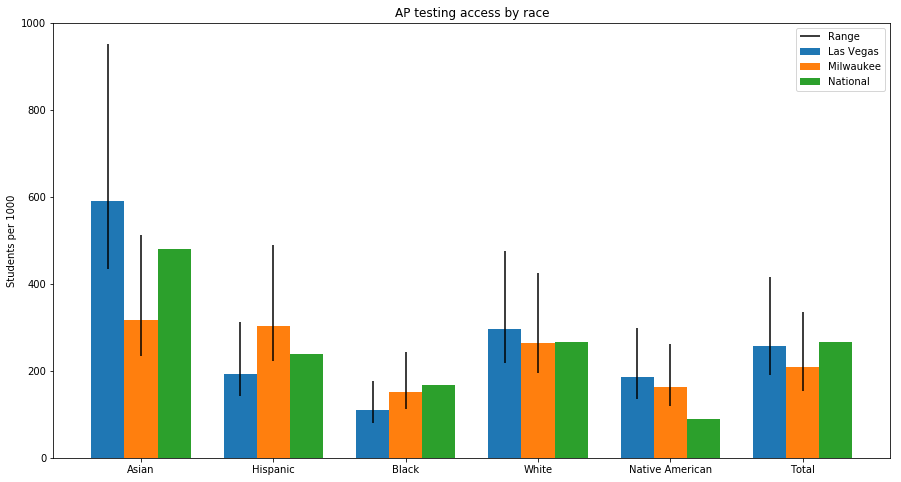

In [127]:
N = 6

fig, ax = plt.subplots(figsize = (15,8))

vegas = vegas_ap_access['Predicted Access']
milwaukee = milwaukee_ap_access['Predicted Access']
national = national_tests_per_1000a['Predicted Access']

milwaukee_upper = milwaukee_ap_access['Upper Access']
milwaukee_lower = milwaukee_ap_access['Lower Access']

vegas_upper = vegas_ap_access['Upper Access']
vegas_lower = vegas_ap_access['Lower Access']

#vegasStd = (vegas_ap_access['Upper Access'] - vegas_ap_access['Predicted Access']).tolist()
#milwaukeeStd = (milwaukee_ap_access['Upper Access'] - vegas_ap_access['Predicted Access']).tolist()

ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

p1 = ax.bar(ind, vegas, width, label = 'Las Vegas')
p2 = ax.bar(ind + width, milwaukee, width, label = 'Milwaukee')
p3 = ax.bar(ind + 2*width, national, width, label = 'National')

p4 = ax.vlines(ind + width, milwaukee_lower, milwaukee_upper, colors='k', linestyles='solid', label='Range')
p5 = ax.vlines(ind, vegas_lower, vegas_upper, colors='k', linestyles='solid')

          
plt.ylabel('Students per 1000')
plt.title('AP testing access by race')
plt.xticks(ind + width, ('Asian', 'Hispanic', 'Black', 'White', 
                             'Native American', 'Total'))
plt.legend()

plt.show()
plt.close()

Some explanatory text

Next up (and something like finally), I want to compute and compare pass rates for all of these. I already have pass rates broken down by race for the national data (where it is actually broken down on a test by test basis). |

In [128]:
ap_by_ethnicity.index = ['Native American', 'Asian/Pacific Islander', 'Black', 'White',
                         'Hispanic', 'Other', 'No Response', 'Total']

In [129]:
pass_rates = pd.DataFrame(0, columns = ['National', 'Milwaukee', 'Las Vegas'], 
                             index = milwaukee_ap_summary.index.tolist())

for i in milwaukee_ap_summary.index.tolist():
    pass_rates.loc[i, 'Milwaukee'] = round(milwaukee_ap_summary.loc[i, 'Passing some AP tests']/
                                      milwaukee_ap_summary.loc[i, 'Taking AP tests'] * 100,1)
    
for i in vegas_ap_summary.index.tolist():
    pass_rates.loc[i, 'Las Vegas'] = round(vegas_ap_summary.loc[i, 'Passing some AP tests']/
                                      vegas_ap_summary.loc[i, 'Taking AP tests'] * 100,1)
    
for i in pass_rates.index.tolist():
    pass_rates.loc[i, 'National'] = round(ap_by_ethnicity.loc[i[:-5], 'Pass Rate'],1)

pass_rates

,National,Milwaukee,Las Vegas
Native American (LB),44.5,66.7,14.3
Native American (UB),44.5,66.7,28.6
Black (LB),28.4,9.3,31.7
Black (UB),28.4,10.3,33.9
Hispanic (LB),41.3,39.4,48.3
Hispanic (UB),41.3,41.4,48.3
Asian/Pacific Islander (LB),67.5,13.5,70.2
Asian/Pacific Islander (UB),67.5,16.5,70.2
White (LB),63.7,46.1,68.4
White (UB),63.7,50.7,68.4


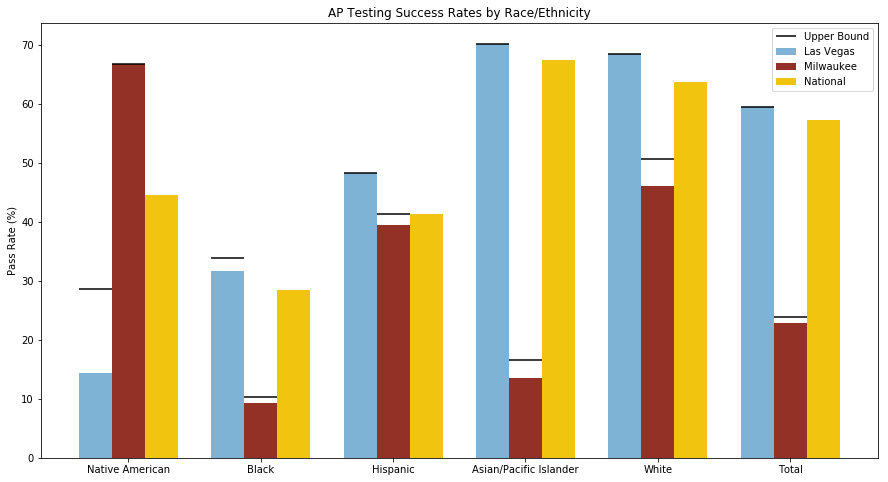

In [130]:
N = 6

lb = [item for item in pass_rates.index.tolist() if '(LB)' in item]
ub = [item for item in pass_rates.index.tolist() if '(UB)' in item]

fig, ax = plt.subplots(figsize = (15,8))

vegas_lb = pass_rates['Las Vegas'].loc[lb].tolist()
vegas_ub = pass_rates['Las Vegas'].loc[ub].tolist()
milwaukee_lb = pass_rates['Milwaukee'].loc[lb].tolist()
milwaukee_ub = pass_rates['Milwaukee'].loc[ub].tolist()
national = pass_rates['National'].loc[ub].tolist()

#vegasStd = (vegas_ap_access['Upper Access'] - vegas_ap_access['Predicted Access']).tolist()
#milwaukeeStd = (milwaukee_ap_access['Upper Access'] - vegas_ap_access['Predicted Access']).tolist()

ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence


p2 = ax.bar(ind, vegas_lb, width, color = '#7FB3D5'  ,label = 'Las Vegas')
p1 = ax.hlines(vegas_ub,ind-width/2, ind+ width/2, colors='k', linestyles='solid', label = 'Upper Bound')

p4 = ax.hlines(milwaukee_ub, ind + width/2, ind + 3* width/2, colors='k', linestyles='solid')
p3 = ax.bar(ind + width, milwaukee_lb, width, color = '#943126', label = 'Milwaukee')

p5 = ax.bar(ind + 2*width, national, width, color = '#F1C40F', label = 'National')

plt.ylabel('Pass Rate (%)')
plt.title('AP Testing Success Rates by Race/Ethnicity')
plt.xticks(ind + width, ('Native American', 'Black', 'Hispanic', 'Asian/Pacific Islander', 
                             'White', 'Total'))
plt.legend()

plt.show()
plt.close()

explanatory text...